This notebook is created exclusively for the NLP course at SBU CSE 534.
It refers to the work done by SMLRA at KJSCE present at https://github.com/orgs/smlra-kjsce/repositories?type=all

#What is PyTorch????

<ol>
<li><a href="https://pytorch.org/">What is PyTorch?</a></li>
<li><a href="https://pytorch.org/tutorials/">What can we do with it?</a></li>
<li><a href="https://towardsdatascience.com/computational-graphs-in-pytorch-and-tensorflow-c25cc40bdcd1">What is a Computation Graph?</a></li>
<li>Looking at a detailed example of PyTorch Graph.</li>  
</ol>

#How PyTorch Works??

## Some basic operations: Thanks to amazing PyTorch resources!

https://pytorch.org/tutorials/beginner/introyt/introyt1_tutorial.html

In [ ]:
import torch
import numpy as np
x = torch.tensor(np.array([[1,2],[3,4]]))
y = torch.tensor(np.array([[1,2],[1,2]]))
print(x+1)
print(x+y)
print(x-y)
print(x*y)
print(x@y) # Guess this???
print(x.shape)
print(x.reshape(-1,1))
print(x.flatten())
print(x.unsqueeze(0).shape)

tensor([[2, 3],
        [4, 5]])
tensor([[2, 4],
        [4, 6]])
tensor([[0, 0],
        [2, 2]])
tensor([[1, 4],
        [3, 8]])
tensor([[ 3,  6],
        [ 7, 14]])
torch.Size([2, 2])
tensor([[1],
        [2],
        [3],
        [4]])
tensor([1, 2, 3, 4])
torch.Size([1, 2, 2])


##Installing the fun tool torchviz to visualize a computational graph

In [ ]:
!pip3 install torchviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


##Importing all Libraries

In [ ]:
# common python stuff
from math import pi
from copy import deepcopy

# fun ML stuff
import pandas as pd # generally used to import/clean/query structured data in python
import matplotlib.pyplot as plt # commonly used to visualize data and make interesting graphs
import numpy as np # provides very fast under-the-hood C-implementation for mathematical operations like matrix multiplication

# The deep-learning stuff!!!!
import torch # the main tool for this course with fast GPU based ML implementations
from torch.autograd import Variable # does Calculus (Calc I, II, III, IV ...) for you! Finds derivative of whatever you want!!
from torchviz import make_dot # helps us understand the above 2

## Insightful Demonstration!!

###Making Data
###Formula of something crazy: mx + b + A1sin(w1x+c1) + A2sin(w2x+c2) + whatever we don't know(noise)

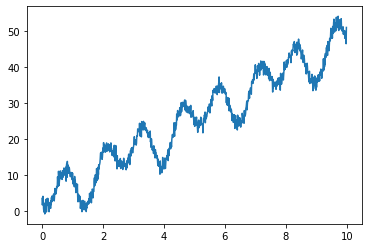

In [ ]:
x = np.array([_/100 for _ in range(1000)]) # creating 1000 sample points
y = 4.5*x + 3 + 2.8 * np.sin( 2.5 * x + pi/3) - 5.2 * np.sin(5 * x + pi/5) + np.random.normal(size=1000) # creating sample outputs
plt.plot(x,y) # plotting the data

Maybe some crazy stuff does look like this

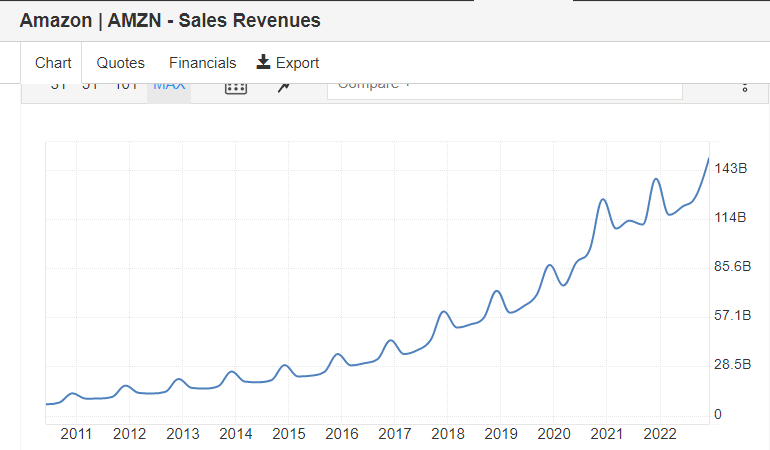

Credits: Trading Economics

###How to compute a function in PyTorch (to use its calculus brain)


Variable() with requires_grad tells what has to be considered for gradients and what doesn't

In [ ]:

# data thus not learnable but making a variable to show in computational graph
x = Variable(torch.tensor(x,dtype=torch.double))
y = Variable(torch.tensor(y,dtype=torch.double))

# what we actually need to figure-out! Initializing randomly but CLOSE ENOUGH.
# try something very different and you will know why is it "close enough"
params = [0]*8
params[0] = m = Variable(torch.tensor(1.2,dtype=torch.double),requires_grad=True)
params[1] = b = Variable(torch.tensor(2.8,dtype=torch.double),requires_grad=True)
params[2] = A1 = Variable(torch.tensor(0.6,dtype=torch.double),requires_grad=True)
params[3] = w1 = Variable(torch.tensor(2.2,dtype=torch.double),requires_grad=True)
params[4] = c1 = Variable(torch.tensor(pi/4,dtype=torch.double),requires_grad=True)
params[5] = A2 = Variable(torch.tensor(-1.0,dtype=torch.double),requires_grad=True)
params[6] = w2 = Variable(torch.tensor(4.0,dtype=torch.double),requires_grad=True)
params[7] = c2 = Variable(torch.tensor(pi/3,dtype=torch.double),requires_grad=True)
print(params[0])

tensor(1.2000, dtype=torch.float64, requires_grad=True)


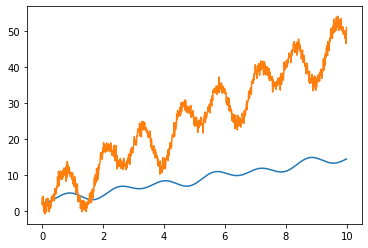

In [ ]:
Y = params[0]*x+params[1]+params[2]*torch.sin(params[3]*x+params[4])+params[5]*torch.sin(params[6]*x+params[7])
plt.plot(x.detach().numpy(),Y.detach().numpy())
plt.plot(x.detach().numpy(),y.detach().numpy())

###Optimization in PyTorch

<u>Initialization

In [ ]:
# Initialize

params = [0]*8
params[0] = m = Variable(torch.tensor(1.2,dtype=torch.double),requires_grad=True)
params[1] = b = Variable(torch.tensor(2.8,dtype=torch.double),requires_grad=True)
params[2] = A1 = Variable(torch.tensor(0.6,dtype=torch.double),requires_grad=True)
params[3] = w1 = Variable(torch.tensor(2.2,dtype=torch.double),requires_grad=True)
params[4] = c1 = Variable(torch.tensor(pi/4,dtype=torch.double),requires_grad=True)
params[5] = A2 = Variable(torch.tensor(-1.0,dtype=torch.double),requires_grad=True)
params[6] = w2 = Variable(torch.tensor(4.0,dtype=torch.double),requires_grad=True)
params[7] = c2 = Variable(torch.tensor(pi/3,dtype=torch.double),requires_grad=True)


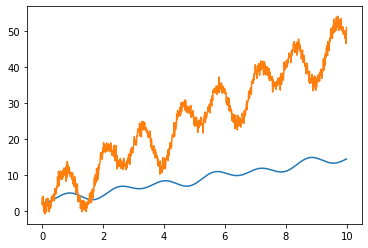

In [ ]:
Y = params[0]*x+params[1]+params[2]*torch.sin(params[3]*x+params[4])+params[5]*torch.sin(params[6]*x+params[7])
plt.plot(x.detach().numpy(),Y.detach().numpy())
plt.plot(x.detach().numpy(),y.detach().numpy())

<u>Computing the Loss and Gradients!

In [ ]:
# Compute the function
Y = params[0]*x+params[1]+params[2]*torch.sin(params[3]*x+params[4])+params[5]*torch.sin(params[6]*x+params[7])

# Compute the loss
loss = ((Y-y)*(Y-y))/2
loss = loss.mean()
print('Total loss: ',loss)

# Zero out the gradients
for i in params:
  if i.grad!=None:
    i.grad.data=torch.tensor(0.0,dtype=torch.double)

# Compute Gradients
loss.backward()
for i in params:
  print(i.grad)

Total loss:  tensor(195.8089, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(-111.2840, dtype=torch.float64)
tensor(-16.6829, dtype=torch.float64)
tensor(-0.4088, dtype=torch.float64)
tensor(5.3617, dtype=torch.float64)
tensor(0.2754, dtype=torch.float64)
tensor(-1.3496, dtype=torch.float64)
tensor(-5.5445, dtype=torch.float64)
tensor(-0.8565, dtype=torch.float64)


<u>Updating the parameters

Using Gradient Descent

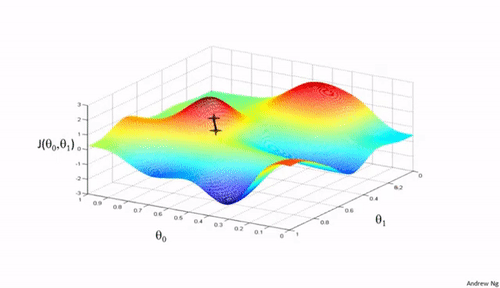

In [ ]:
# Update Paramters
lr = 1e-3
for i in range(len(params)):
  params[i] = params[i] - lr*params[i].grad.data

for i in params:
  print(i)

tensor(1.3113, dtype=torch.float64, grad_fn=<SubBackward0>)
tensor(2.8167, dtype=torch.float64, grad_fn=<SubBackward0>)
tensor(0.6004, dtype=torch.float64, grad_fn=<SubBackward0>)
tensor(2.1946, dtype=torch.float64, grad_fn=<SubBackward0>)
tensor(0.7851, dtype=torch.float64, grad_fn=<SubBackward0>)
tensor(-0.9987, dtype=torch.float64, grad_fn=<SubBackward0>)
tensor(4.0055, dtype=torch.float64, grad_fn=<SubBackward0>)
tensor(1.0481, dtype=torch.float64, grad_fn=<SubBackward0>)


###Complete Training Loop

<ipython-input-118-7b10d903ee5e>:47: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  params[i] = Variable(torch.tensor(params[i] - lr*params[i].grad.data,dtype=torch.double),requires_grad=True)


Epoch:  0
Loss:  tensor(13.6839, dtype=torch.float64, grad_fn=<MeanBackward0>)


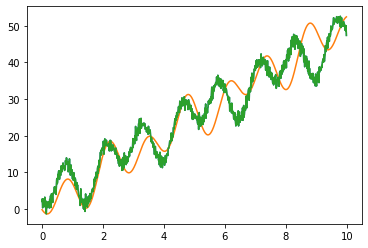

<ipython-input-118-7b10d903ee5e>:47: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  params[i] = Variable(torch.tensor(params[i] - lr*params[i].grad.data,dtype=torch.double),requires_grad=True)


Epoch:  50
Loss:  tensor(1.6167, dtype=torch.float64, grad_fn=<MeanBackward0>)


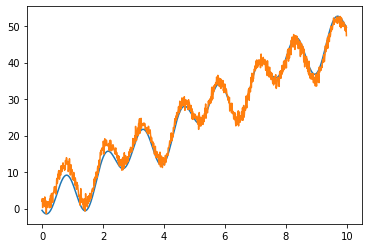

Epoch:  100
Loss:  tensor(1.5847, dtype=torch.float64, grad_fn=<MeanBackward0>)


<ipython-input-118-7b10d903ee5e>:47: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  params[i] = Variable(torch.tensor(params[i] - lr*params[i].grad.data,dtype=torch.double),requires_grad=True)


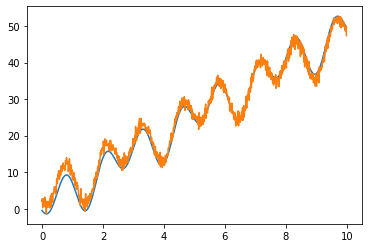

<ipython-input-118-7b10d903ee5e>:47: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  params[i] = Variable(torch.tensor(params[i] - lr*params[i].grad.data,dtype=torch.double),requires_grad=True)


Epoch:  150
Loss:  tensor(1.5544, dtype=torch.float64, grad_fn=<MeanBackward0>)


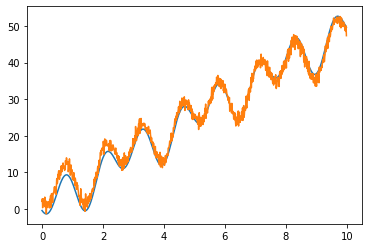

<ipython-input-118-7b10d903ee5e>:47: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  params[i] = Variable(torch.tensor(params[i] - lr*params[i].grad.data,dtype=torch.double),requires_grad=True)


Epoch:  200
Loss:  tensor(1.5255, dtype=torch.float64, grad_fn=<MeanBackward0>)


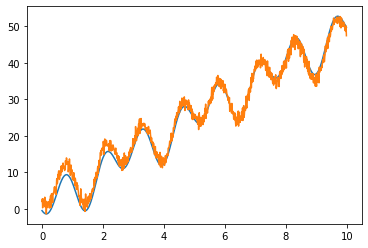

<ipython-input-118-7b10d903ee5e>:47: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  params[i] = Variable(torch.tensor(params[i] - lr*params[i].grad.data,dtype=torch.double),requires_grad=True)


Epoch:  250
Loss:  tensor(1.4977, dtype=torch.float64, grad_fn=<MeanBackward0>)


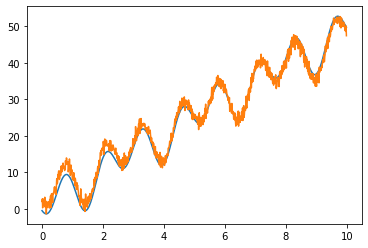

<ipython-input-118-7b10d903ee5e>:47: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  params[i] = Variable(torch.tensor(params[i] - lr*params[i].grad.data,dtype=torch.double),requires_grad=True)


Epoch:  300
Loss:  tensor(1.4711, dtype=torch.float64, grad_fn=<MeanBackward0>)


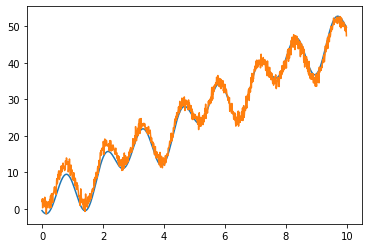

<ipython-input-118-7b10d903ee5e>:47: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  params[i] = Variable(torch.tensor(params[i] - lr*params[i].grad.data,dtype=torch.double),requires_grad=True)


Epoch:  350
Loss:  tensor(1.4454, dtype=torch.float64, grad_fn=<MeanBackward0>)


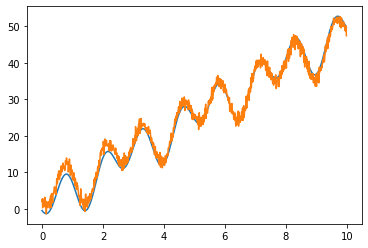

<ipython-input-118-7b10d903ee5e>:47: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  params[i] = Variable(torch.tensor(params[i] - lr*params[i].grad.data,dtype=torch.double),requires_grad=True)


Epoch:  400
Loss:  tensor(1.4207, dtype=torch.float64, grad_fn=<MeanBackward0>)


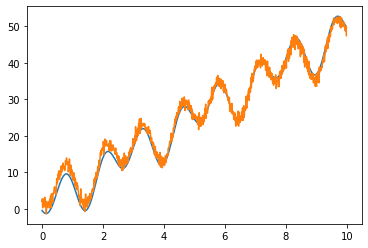

<ipython-input-118-7b10d903ee5e>:47: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  params[i] = Variable(torch.tensor(params[i] - lr*params[i].grad.data,dtype=torch.double),requires_grad=True)


Epoch:  450
Loss:  tensor(1.3969, dtype=torch.float64, grad_fn=<MeanBackward0>)


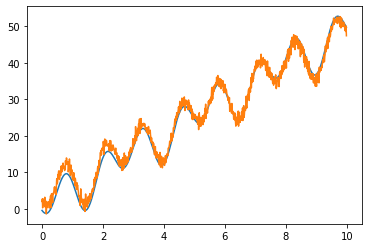

<ipython-input-118-7b10d903ee5e>:47: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  params[i] = Variable(torch.tensor(params[i] - lr*params[i].grad.data,dtype=torch.double),requires_grad=True)


Epoch:  500
Loss:  tensor(1.3738, dtype=torch.float64, grad_fn=<MeanBackward0>)


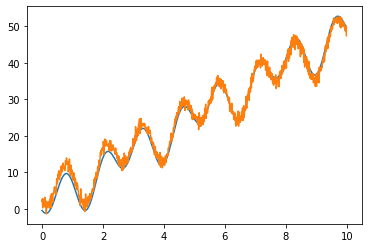

<ipython-input-118-7b10d903ee5e>:47: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  params[i] = Variable(torch.tensor(params[i] - lr*params[i].grad.data,dtype=torch.double),requires_grad=True)


Epoch:  550
Loss:  tensor(1.3515, dtype=torch.float64, grad_fn=<MeanBackward0>)


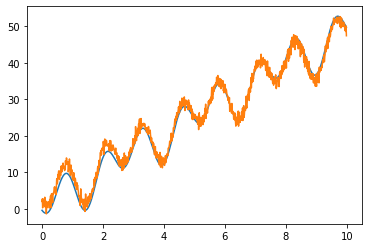

<ipython-input-118-7b10d903ee5e>:47: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  params[i] = Variable(torch.tensor(params[i] - lr*params[i].grad.data,dtype=torch.double),requires_grad=True)


Epoch:  600
Loss:  tensor(1.3300, dtype=torch.float64, grad_fn=<MeanBackward0>)


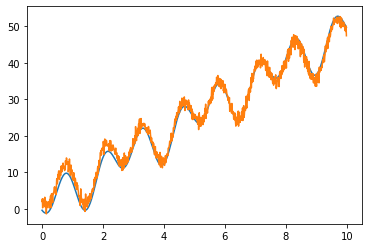

<ipython-input-118-7b10d903ee5e>:47: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  params[i] = Variable(torch.tensor(params[i] - lr*params[i].grad.data,dtype=torch.double),requires_grad=True)


Epoch:  650
Loss:  tensor(1.3091, dtype=torch.float64, grad_fn=<MeanBackward0>)


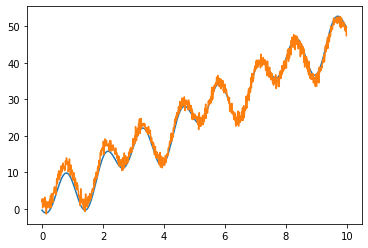

<ipython-input-118-7b10d903ee5e>:47: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  params[i] = Variable(torch.tensor(params[i] - lr*params[i].grad.data,dtype=torch.double),requires_grad=True)


Epoch:  700
Loss:  tensor(1.2888, dtype=torch.float64, grad_fn=<MeanBackward0>)


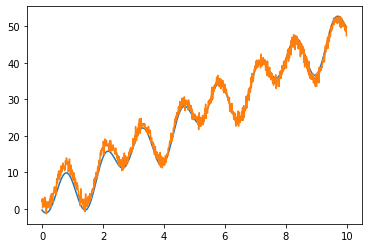

<ipython-input-118-7b10d903ee5e>:47: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  params[i] = Variable(torch.tensor(params[i] - lr*params[i].grad.data,dtype=torch.double),requires_grad=True)


Epoch:  750
Loss:  tensor(1.2691, dtype=torch.float64, grad_fn=<MeanBackward0>)


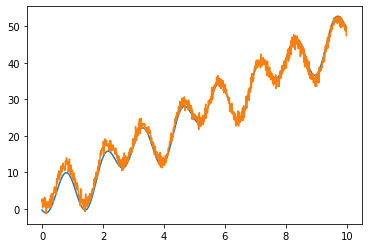

Epoch:  800
Loss:  tensor(1.2500, dtype=torch.float64, grad_fn=<MeanBackward0>)


<ipython-input-118-7b10d903ee5e>:47: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  params[i] = Variable(torch.tensor(params[i] - lr*params[i].grad.data,dtype=torch.double),requires_grad=True)


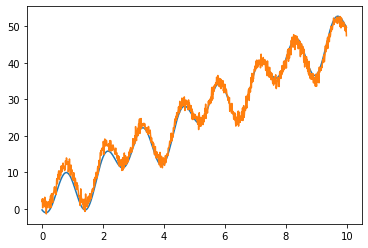

<ipython-input-118-7b10d903ee5e>:47: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  params[i] = Variable(torch.tensor(params[i] - lr*params[i].grad.data,dtype=torch.double),requires_grad=True)


Epoch:  850
Loss:  tensor(1.2315, dtype=torch.float64, grad_fn=<MeanBackward0>)


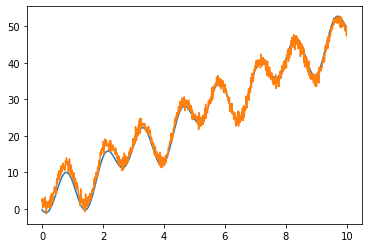

<ipython-input-118-7b10d903ee5e>:47: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  params[i] = Variable(torch.tensor(params[i] - lr*params[i].grad.data,dtype=torch.double),requires_grad=True)


Epoch:  900
Loss:  tensor(1.2135, dtype=torch.float64, grad_fn=<MeanBackward0>)


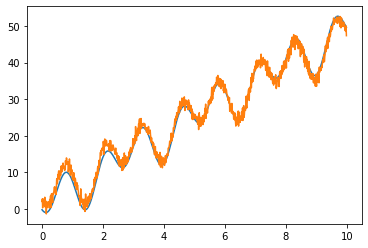

<ipython-input-118-7b10d903ee5e>:47: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  params[i] = Variable(torch.tensor(params[i] - lr*params[i].grad.data,dtype=torch.double),requires_grad=True)


Epoch:  950
Loss:  tensor(1.1960, dtype=torch.float64, grad_fn=<MeanBackward0>)


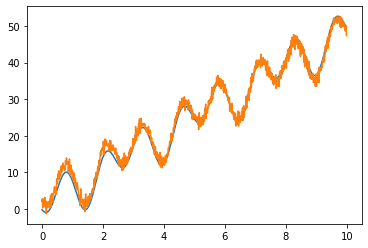

<ipython-input-118-7b10d903ee5e>:47: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  params[i] = Variable(torch.tensor(params[i] - lr*params[i].grad.data,dtype=torch.double),requires_grad=True)


Epoch:  1000
Loss:  tensor(1.1790, dtype=torch.float64, grad_fn=<MeanBackward0>)


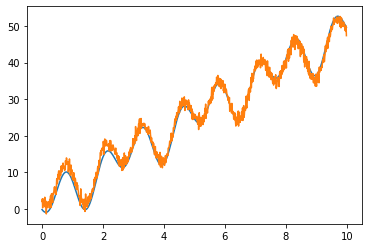

tensor(4.8616, dtype=torch.float64, requires_grad=True)
tensor(0.6389, dtype=torch.float64, requires_grad=True)
tensor(2.7861, dtype=torch.float64, requires_grad=True)
tensor(2.5062, dtype=torch.float64, requires_grad=True)
tensor(0.9435, dtype=torch.float64, requires_grad=True)
tensor(-5.0452, dtype=torch.float64, requires_grad=True)
tensor(4.9990, dtype=torch.float64, requires_grad=True)
tensor(0.6538, dtype=torch.float64, requires_grad=True)


In [ ]:
losses = []

x = np.array([_/100 for _ in range(1000)])
y = 4.5*x + 3 + 2.8 * np.sin( 2.5 * x + pi/3) - 5.2 * np.sin(5 * x + pi/5) + np.random.normal(size=1000)


plt.plot(x,y)
x = Variable(torch.tensor(x,dtype=torch.double))
y= Variable(torch.tensor(y,dtype=torch.double))

# please play with these initial values
params = [0]*8
params[0] = m = Variable(torch.tensor(5,dtype=torch.double),requires_grad=True)
params[1] = b = Variable(torch.tensor(0,dtype=torch.double),requires_grad=True)
params[2] = A1 = Variable(torch.tensor(2.7,dtype=torch.double),requires_grad=True)
params[3] = w1 = Variable(torch.tensor(0.9*pi,dtype=torch.double),requires_grad=True)
params[4] = c1 = Variable(torch.tensor(1.1*pi/3,dtype=torch.double),requires_grad=True)
params[5] = A2 = Variable(torch.tensor(-5.0,dtype=torch.double),requires_grad=True)
params[6] = w2 = Variable(torch.tensor(4.8,dtype=torch.double),requires_grad=True)
params[7] = c2 = Variable(torch.tensor(0.9*pi/5,dtype=torch.double),requires_grad=True)

lr = 1e-3

for epoch in range(1001):
  
  # Learning Rate Scheduling
  #lr = lr*0.99
  
  # Compute the function
  Y = params[0]*x+params[1]+params[2]*torch.sin(params[3]*x+params[4])+params[5]*torch.sin(params[6]*x+params[7])

  # Compute the loss
  loss = ((Y-y)*(Y-y))/2
  loss = loss.mean()

  # Zero out the gradients
  for i in params:
    if i.grad!=None:
      i.grad.data=torch.tensor(0.0,dtype=torch.double)

  # Compute Gradients
  loss.backward()
  
  losses.append(loss.detach().numpy())
    
  # Update Parameters
  for i in range(len(params)):
    params[i] = Variable(torch.tensor(params[i] - lr*params[i].grad.data,dtype=torch.double),requires_grad=True)
  
  if epoch%50==0:
    print('Epoch: ',epoch)
    print("Loss: ",loss)
    plt.plot(x.detach().numpy(),Y.detach().numpy())
    plt.plot(x.detach().numpy(),y.detach().numpy())
    plt.show()
    
for i in params:
  print(i)

Why does it work with this initialization and not others????
https://www.desmos.com/calculator/5jzw1xtvis

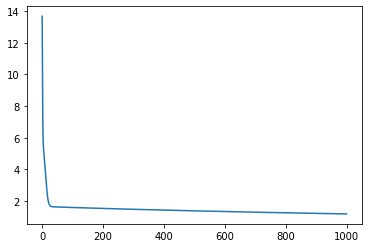

In [ ]:
losses = np.array(losses)
plt.plot(losses)

### The Computational Graph

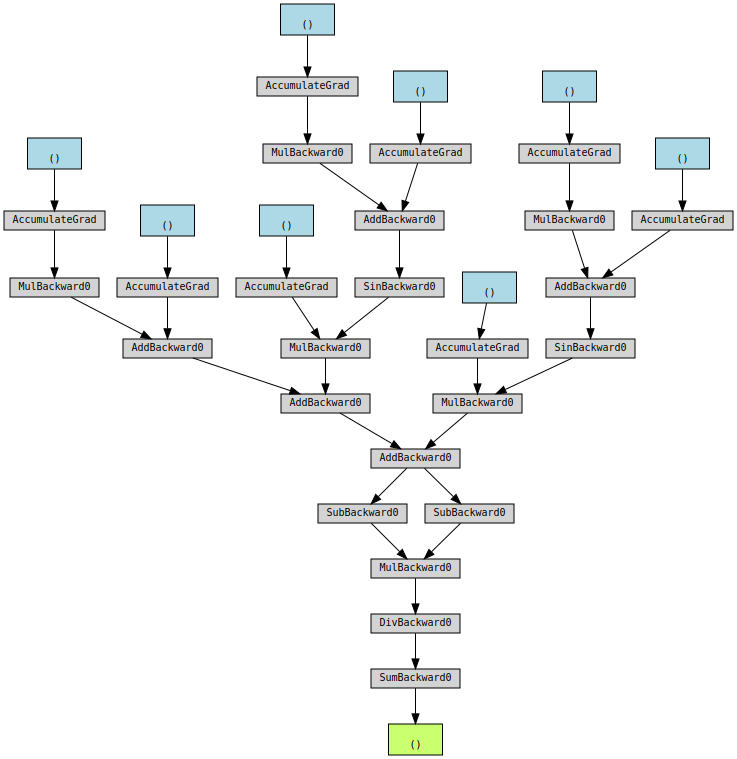

In [ ]:
import torch
from torch import nn
from torchviz import make_dot, make_dot_from_trace

x = np.array([_/100 for _ in range(1000)])
y = 4.5*x + 3 + 2.8 * np.sin( 0.5 * pi * x + pi/3) - 5.2 * np.sin(0.25 * pi * x + pi/5) + np.random.normal(size=1000)


x = Variable(torch.tensor(x,dtype=torch.double))
y= Variable(torch.tensor(y,dtype=torch.double))

params = [0]*8
params[0] = m = Variable(torch.tensor(1.2,dtype=torch.double),requires_grad=True)
params[1] = b = Variable(torch.tensor(0,dtype=torch.double),requires_grad=True)
params[2] = A1 = Variable(torch.tensor(2.7,dtype=torch.double),requires_grad=True)
params[3] = w1 = Variable(torch.tensor(0.45*pi,dtype=torch.double),requires_grad=True)
params[4] = c1 = Variable(torch.tensor(1.1*pi/3,dtype=torch.double),requires_grad=True)
params[5] = A2 = Variable(torch.tensor(-5.0,dtype=torch.double),requires_grad=True)
params[6] = w2 = Variable(torch.tensor(0.23*pi,dtype=torch.double),requires_grad=True)
params[7] = c2 = Variable(torch.tensor(0.9*pi/5,dtype=torch.double),requires_grad=True)

# Compute the function
Y = params[0]*x+params[1]+params[2]*torch.sin(params[3]*x+params[4])+params[5]*torch.sin(params[6]*x+params[7])

# Compute the loss
loss = ((Y-y)*(Y-y))/2
loss = loss.sum()

make_dot(loss)

# Logistic Regression and structured use of PyTorch

##Downloading Kaggle Dataset

Dataset Link: https://www.kaggle.com/datasets/balaka18/email-spam-classification-dataset-csv

In [30]:
! pip install -q kaggle

In [31]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"jasdeepsinghgrover","key":"03207959008c3e4e0dd6e30d41bc0f98"}'}

In [32]:
! chmod 600 kaggle.json

In [33]:
! mkdir kaggle
! cp kaggle.json kaggle/

mkdir: cannot create directory ‘kaggle’: File exists


In [ ]:
!kaggle datasets download -d balaka18/email-spam-classification-dataset-csv

In [1]:
!unzip /content/email-spam-classification-dataset-csv.zip

Archive:  /content/email-spam-classification-dataset-csv.zip
replace emails.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: emails.csv              


##Analyzing the Dataset

In [2]:
import pandas as pd # for loading and analyzing datasets
import numpy as np # for analysis, visualization and simple ML
import torch # for deep learning implementations
import nltk # for NLP specific processing
import matplotlib.pyplot as plt # for plotting and visualizing
from nltk.corpus import stopwords # helps in removing words like 'a', 'I', 'the'
nltk.download('stopwords')
from nltk.corpus import words # very large set of english words

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
# creating some fruit data
data = pd.read_csv('/content/emails.csv') # loading a dataset
device = 'cpu' # change 'cpu' to 'cuda' and enjoy the GPU !!!!

In [4]:
data

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,Email 5168,2,2,2,3,0,0,32,0,0,...,0,0,0,0,0,0,0,0,0,0
5168,Email 5169,35,27,11,2,6,5,151,4,3,...,0,0,0,0,0,0,0,1,0,0
5169,Email 5170,0,0,1,1,0,0,11,0,0,...,0,0,0,0,0,0,0,0,0,1
5170,Email 5171,2,7,1,0,2,1,28,2,0,...,0,0,0,0,0,0,0,1,0,1


In [5]:
for col in data.columns:
  print(col)

Email No.
the
to
ect
and
for
of
a
you
hou
in
on
is
this
enron
i
be
that
will
have
with
your
at
we
s
are
it
by
com
as
from
gas
or
not
me
deal
if
meter
hpl
please
re
e
any
our
corp
can
d
all
has
was
know
need
an
forwarded
new
t
may
up
j
mmbtu
should
do
am
get
out
see
no
there
price
daren
but
been
company
l
these
let
so
would
m
into
xls
farmer
attached
us
information
they
message
day
time
my
one
what
only
http
th
volume
mail
contract
which
month
more
robert
sitara
about
texas
nom
energy
pec
questions
www
deals
volumes
pm
ena
now
their
file
some
email
just
also
call
change
other
here
like
b
flow
net
following
p
production
when
over
back
want
original
them
below
o
ticket
c
he
could
make
inc
report
march
contact
were
days
list
nomination
system
who
april
number
sale
don
its
first
thanks
business
help
per
through
july
forward
font
free
daily
use
order
today
r
had
fw
set
plant
statements
go
gary
oil
line
sales
w
effective
well
tenaska
take
june
x
within
nbsp
she
how
north
america
being
under
n

In [6]:
sw = set(stopwords.words('english'))
sw

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [7]:
en_words = words.words()
en_words

['A',
 'a',
 'aa',
 'aal',
 'aalii',
 'aam',
 'Aani',
 'aardvark',
 'aardwolf',
 'Aaron',
 'Aaronic',
 'Aaronical',
 'Aaronite',
 'Aaronitic',
 'Aaru',
 'Ab',
 'aba',
 'Ababdeh',
 'Ababua',
 'abac',
 'abaca',
 'abacate',
 'abacay',
 'abacinate',
 'abacination',
 'abaciscus',
 'abacist',
 'aback',
 'abactinal',
 'abactinally',
 'abaction',
 'abactor',
 'abaculus',
 'abacus',
 'Abadite',
 'abaff',
 'abaft',
 'abaisance',
 'abaiser',
 'abaissed',
 'abalienate',
 'abalienation',
 'abalone',
 'Abama',
 'abampere',
 'abandon',
 'abandonable',
 'abandoned',
 'abandonedly',
 'abandonee',
 'abandoner',
 'abandonment',
 'Abanic',
 'Abantes',
 'abaptiston',
 'Abarambo',
 'Abaris',
 'abarthrosis',
 'abarticular',
 'abarticulation',
 'abas',
 'abase',
 'abased',
 'abasedly',
 'abasedness',
 'abasement',
 'abaser',
 'Abasgi',
 'abash',
 'abashed',
 'abashedly',
 'abashedness',
 'abashless',
 'abashlessly',
 'abashment',
 'abasia',
 'abasic',
 'abask',
 'Abassin',
 'abastardize',
 'abatable',
 'abate

### Set of all names

In [8]:
names = {'Aamir','Aaron','Abbey','Abbie','Abbot','Abbott','Abby','Abdel','Abdul','Abdulkarim','Abdullah','Abe','Abel','Abelard','Abner','Abraham','Abram','Ace','Adair','Adam','Adams','Addie','Adger','Aditya','Adlai','Adnan','Adolf','Adolfo','Adolph','Adolphe','Adolpho','Adolphus','Adrian','Adrick','Adrien','Agamemnon','Aguinaldo','Aguste','Agustin','Aharon','Ahmad','Ahmed','Ahmet','Ajai','Ajay','Al','Alaa','Alain','Alan','Alasdair','Alastair','Albatros','Albert','Alberto','Albrecht','Alden','Aldis','Aldo','Aldric','Aldrich','Aldus','Aldwin','Alec','Aleck','Alejandro','Aleks','Aleksandrs','Alessandro','Alex','Alexander','Alexei','Alexis','Alf','Alfie','Alfonse','Alfonso','Alfonzo','Alford','Alfred','Alfredo','Algernon','Ali','Alic','Alister','Alix','Allah','Allan','Allen','Alley','Allie','Allin','Allyn','Alonso','Alonzo','Aloysius','Alphonse','Alphonso','Alston','Alton','Alvin','Alwin','Amadeus','Ambros','Ambrose','Ambrosi','Ambrosio','Ambrosius','Amery','Amory','Amos','Anatol','Anatole','Anatollo','Anatoly','Anders','Andie','Andonis','Andre','Andrea','Andreas','Andrej','Andres','Andrew','Andrey','Andri','Andros','Andrus','Andrzej','Andy','Angel','Angelico','Angelo','Angie','Angus','Ansel','Ansell','Anselm','Anson','Anthony','Antin','Antoine','Anton','Antone','Antoni','Antonin','Antonino','Antonio','Antonius','Antony','Anurag','Apollo','Apostolos','Aram','Archibald','Archibold','Archie','Archon','Archy','Arel','Ari','Arie','Ariel','Aristotle','Arlo','Armand','Armando','Armond','Armstrong','Arne','Arnie','Arnold','Arnoldo','Aron','Arron','Art','Arther','Arthur','Artie','Artur','Arturo','Arvie','Arvin','Arvind','Arvy','Ash','Ashby','Ashish','Ashley','Ashton','Aub','Aube','Aubert','Aubrey','Augie','August','Augustin','Augustine','Augusto','Augustus','Austen','Austin','Ave','Averell','Averil','Averill','Avery','Avi','Avraham','Avram','Avrom','Axel','Aylmer','Aziz','Bailey','Bailie','Baillie','Baily','Baird','Baldwin','Bancroft','Barbabas','Barclay','Bard','Barde','Barn','Barnabas','Barnabe','Barnaby','Barnard','Barnebas','Barnett','Barney','Barnie','Barny','Baron','Barr','Barret','Barrett','Barri','Barrie','Barris','Barron','Barry','Bart','Bartel','Barth','Barthel','Bartholemy','Bartholomeo','Bartholomeus','Bartholomew','Bartie','Bartlet','Bartlett','Bartolemo','Bartolomei','Bartolomeo','Barton','Barty','Bary','Basil','Batholomew','Baxter','Bay','Bayard','Beale','Bealle','Bear','Bearnard','Beau','Beaufort','Beauregard','Beck','Bela','Ben','Benedict','Bengt','Benito','Benjamen','Benjamin','Benji','Benjie','Benjy','Benn','Bennet','Bennett','Bennie','Benny','Benson','Bentley','Benton','Beowulf','Berchtold','Berk','Berke','Berkeley','Berkie','Berkley','Bernard','Bernardo','Bernd','Bernhard','Bernie','Bert','Bertie','Bertram','Bertrand','Bharat','Biff','Bill','Billie','Billy','Bing','Binky','Bishop','Bjorn','Bjorne','Blaine','Blair','Blake','Blare','Blayne','Bo','Bob','Bobbie','Bobby','Bogart','Bogdan','Boniface','Boris','Boyce','Boyd','Brad','Braden','Bradford','Bradley','Bradly','Brady','Brandon','Brandy','Brant','Brendan','Brent','Bret','Brett','Brewer','Brewster','Brian','Brice','Briggs','Brinkley','Britt','Brock','Broddie','Broddy','Broderic','Broderick','Brodie','Brody','Bronson','Brook','Brooke','Brooks','Bruce','Bruno','Bryan','Bryant','Bryce','Bryn','Bryon','Bubba','Buck','Bucky','Bud','Buddy','Burgess','Burke','Burl','Burnaby','Burt','Burton','Buster','Butch','Butler','Byram','Byron','Caesar','Cain','Cal','Caldwell','Caleb','Calhoun','Calvin','Cam','Cameron','Cammy','Carey','Carl','Carleigh','Carlie','Carlin','Carlo','Carlos','Carlton','Carlyle','Carmine','Carroll','Carson','Carsten','Carter','Cary','Caryl','Case','Casey','Caspar','Casper','Cass','Cat','Cecil','Cesar','Chad','Chadd','Chaddie','Chaddy','Chadwick','Chaim','Chalmers','Chan','Chance','Chancey','Chanderjit','Chandler','Chane','Chariot','Charles','Charleton','Charley','Charlie','Charlton','Chas','Chase','Chaunce','Chauncey','Che','Chelton','Chen','Chester','Cheston','Chet','Chev','Chevalier','Chevy','Chip','Chris','Chrissy','Christ','Christian','Christiano','Christie','Christof','Christofer','Christoph','Christophe','Christopher','Christorpher','Christos','Christy','Chrisy','Chuck','Churchill','Clair','Claire','Clancy','Clarance','Clare','Clarence','Clark','Clarke','Claude','Claudio','Claudius','Claus','Clay','Clayborn','Clayborne','Claybourne','Clayton','Cleland','Clem','Clemens','Clement','Clemente','Clemmie','Cletus','Cleveland','Cliff','Clifford','Clifton','Clint','Clinten','Clinton','Clive','Clyde','Cob','Cobb','Cobbie','Cobby','Cody','Colbert','Cole','Coleman','Colin','Collin','Collins','Conan','Connie','Connolly','Connor','Conrad','Conroy','Constantin','Constantine','Constantinos','Conway','Cooper','Corbin','Corby','Corey','Corky','Cornelius','Cornellis','Corrie','Cortese','Corwin','Cory','Cosmo','Costa','Courtney','Craig','Crawford','Creighton','Cris','Cristopher','Curt','Curtice','Curtis','Cy','Cyril','Cyrill','Cyrille','Cyrillus','Cyrus','Dabney','Daffy','Dale','Dallas','Dalton','Damian','Damien','Damon','Dan','Dana','Dane','Dani','Danie','Daniel','Dannie','Danny','Dante','Darby','Darcy','Daren','Darian','Darien','Darin','Dario','Darius','Darrel','Darrell','Darren','Darrick','Darrin','Darryl','Darth','Darwin','Daryl','Daryle','Dave','Davey','David','Davidde','Davide','Davidson','Davie','Davin','Davis','Davon','Davoud','Davy','Dawson','Dean','Deane','Del','Delbert','Dell','Delmar','Demetre','Demetri','Demetris','Demetrius','Demosthenis','Denis','Dennie','Dennis','Denny','Derby','Derek','Derick','Derk','Derrek','Derrick','Derrin','Derrol','Derron','Deryl','Desmond','Desmund','Devin','Devon','Dewey','Dewitt','Dexter','Dick','Dickey','Dickie','Diego','Dieter','Dietrich','Dillon','Dimitri','Dimitrios','Dimitris','Dimitrou','Dimitry','Dino','Dion','Dionis','Dionysus','Dirk','Dmitri','Dom','Domenic','Domenico','Dominic','Dominick','Dominique','Don','Donal','Donald','Donn','Donnie','Donny','Donovan','Dorian','Dory','Doug','Douggie','Dougie','Douglas','Douglass','Douglis','Dov','Doyle','Drake','Drew','Dru','Dryke','Duane','Dudley','Duffie','Duffy','Dugan','Duke','Dunc','Duncan','Dunstan','Durand','Durant','Durante','Durward','Dustin','Dwain','Dwaine','Dwane','Dwayne','Dwight','Dylan','Dyson','Earl','Earle','Easton','Eben','Ebeneser','Ebenezer','Eberhard','Ed','Eddie','Eddy','Edgar','Edgardo','Edie','Edmond','Edmund','Edouard','Edsel','Eduard','Eduardo','Edward','Edwin','Efram','Egbert','Ehud','Elbert','Elden','Eldon','Eli','Elias','Elihu','Elijah','Eliot','Eliott','Elisha','Elliot','Elliott','Ellis','Ellsworth','Ellwood','Elmer','Elmore','Elnar','Elric','Elroy','Elton','Elvin','Elvis','Elwin','Elwood','Elwyn','Ely','Emanuel','Emerson','Emery','Emil','Emile','Emilio','Emmanuel','Emmery','Emmet','Emmett','Emmit','Emmott','Emmy','Emory','Ender','Engelbart','Engelbert','Englebart','Englebert','Enoch','Enrico','Enrique','Ephraim','Ephram','Ephrayim','Ephrem','Er','Erasmus','Erastus','Erek','Erhard','Erhart','Eric','Erich','Erick','Erik','Erin','Erl','Ernest','Ernesto','Ernie','Ernst','Erny','Errol','Ervin','Erwin','Esau','Esme','Esteban','Ethan','Ethelbert','Ethelred','Etienne','Euclid','Eugen','Eugene','Eustace','Ev','Evan','Evelyn','Everard','Everett','Ewan','Ewart','Ez','Ezechiel','Ezekiel','Ezra','Fabian','Fabio','Fairfax','Farley','Fazeel','Federico','Felice','Felicio','Felipe','Felix','Ferd','Ferdie','Ferdinand','Ferdy','Fergus','Ferguson','Ferinand','Fernando','Fidel','Filbert','Filip','Filipe','Filmore','Finley','Finn','Fitz','Fitzgerald','Flem','Fleming','Flemming','Fletch','Fletcher','Flin','Flinn','Flint','Flipper','Florian','Floyd','Flynn','Fons','Fonsie','Fonz','Fonzie','Forbes','Ford','Forest','Forester','Forrest','Forrester','Forster','Foster','Fowler','Fox','Fran','Francesco','Francis','Francisco','Francois','Frank','Frankie','Franklin','Franklyn','Franky','Frans','Franz','Fraser','Frazier','Fred','Freddie','Freddy','Frederic','Frederich','Frederick','Frederico','Frederik','Fredric','Fredrick','Freeman','Freemon','Fremont','French','Friedric','Friedrich','Friedrick','Fritz','Fulton','Fyodor','Gabe','Gabriel','Gabriele','Gabriell','Gabriello','Gail','Gale','Galen','Gallagher','Gamaliel','Garcia','Garcon','Gardener','Gardiner','Gardner','Garey','Garfield','Garfinkel','Garold','Garp','Garret','Garrett','Garrot','Garrott','Garry','Garth','Garv','Garvey','Garvin','Garvy','Garwin','Garwood','Gary','Gaspar','Gasper','Gaston','Gav','Gaven','Gavin','Gavriel','Gay','Gayle','Gearard','Gene','Geo','Geof','Geoff','Geoffrey','Geoffry','Georg','George','Georges','Georgia','Georgie','Georgy','Gerald','Geraldo','Gerard','Gere','Gerhard','Gerhardt','Geri','Germaine','Gerold','Gerome','Gerrard','Gerri','Gerrit','Gerry','Gershom','Gershon','Giacomo','Gian','Giancarlo','Giavani','Gibb','Gideon','Giff','Giffard','Giffer','Giffie','Gifford','Giffy','Gil','Gilbert','Gilberto','Gilburt','Giles','Gill','Gilles','Ginger','Gino','Giordano','Giorgi','Giorgio','Giovanne','Giovanni','Giraldo','Giraud','Giuseppe','Glen','Glenn','Glynn','Godard','Godart','Goddard','Goddart','Godfree','Godfrey','Godfry','Godwin','Gomer','Gonzales','Gonzalo','Goober','Goose','Gordan','Gordie','Gordon','Grace','Grady','Graehme','Graeme','Graham','Graig','Grant','Granville','Greg','Gregg','Greggory','Gregor','Gregorio','Gregory','Gretchen','Griff','Griffin','Griffith','Griswold','Grove','Grover','Guido','Guillaume','Guillermo','Gunner','Gunter','Gunther','Gus','Gustaf','Gustav','Gustave','Gustavo','Gustavus','Guthrey','Guthrie','Guthry','Guy','Hadleigh','Hadley','Hadrian','Hagan','Hagen','Hailey','Hakeem','Hakim','Hal','Hale','Haleigh','Haley','Hall','Hallam','Halvard','Ham','Hamel','Hamid','Hamil','Hamilton','Hamish','Hamlen','Hamlet','Hamlin','Hammad','Hamnet','Han','Hanan','Hanford','Hank','Hannibal','Hans','Hans-Peter','Hansel','Hanson','Harald','Harcourt','Hari','Harlan','Harland','Harley','Harlin','Harman','Harmon','Harold','Harris','Harrison','Harrold','Harry','Hart','Hartley','Hartwell','Harv','Harvard','Harvey','Harvie','Harwell','Hasheem','Hashim','Haskel','Haskell','Hassan','Hastings','Hasty','Haven','Hayden','Haydon','Hayes','Hayward','Haywood','Hazel','Heath','Heathcliff','Hebert','Hector','Heinrich','Heinz','Helmuth','Henderson','Hendrick','Hendrik','Henri','Henrie','Henrik','Henrique','Henry','Herb','Herbert','Herbie','Herby','Hercule','Hercules','Herculie','Herman','Hermann','Hermon','Hermy','Hernando','Herold','Herrick','Herrmann','Hersch','Herschel','Hersh','Hershel','Herve','Hervey','Hew','Hewe','Hewet','Hewett','Hewie','Hewitt','Heywood','Hezekiah','Higgins','Hilary','Hilbert','Hill','Hillard','Hillary','Hillel','Hillery','Hilliard','Hilton','Hiralal','Hiram','Hiro','Hirsch','Hobart','Hodge','Hogan','Hollis','Holly','Homer','Horace','Horacio','Horatio','Horatius','Horst','Howard','Howie','Hoyt','Hubert','Hudson','Huey','Hugh','Hugo','Humbert','Humphrey','Hunt','Hunter','Huntington','Huntlee','Huntley','Hurley','Husain','Husein','Hussein','Hy','Hyatt','Hyman','Hymie','Iago','Iain','Ian','Ibrahim','Ichabod','Iggie','Iggy','Ignace','Ignacio','Ignacius','Ignatius','Ignaz','Ignazio','Igor','Ike','Ikey','Immanuel','Ingamar','Ingelbert','Ingemar','Inglebert','Ingmar','Ingram','Inigo','Ira','Irvin','Irvine','Irving','Irwin','Isa','Isaac','Isaak','Isador','Isadore','Isaiah','Ishmael','Isidore','Ismail','Israel','Istvan','Ivan','Ivor','Izaak','Izak','Izzy','Jabez','Jack','Jackie','Jackson','Jacob','Jacques','Jae','Jaime','Jake','Jakob','James','Jameson','Jamey','Jamie','Jan','Janos','Janus','Jared','Jarrett','Jarvis','Jason','Jasper','Javier','Jay','Jean','Jean-Christophe','Jean-Francois','Jean-Lou','Jean-Luc','Jean-Marc','Jean-Paul','Jean-Pierre','Jeb','Jed','Jedediah','Jef','Jeff','Jefferey','Jefferson','Jeffery','Jeffie','Jeffrey','Jeffry','Jefry','Jehu','Jennings','Jens','Jephthah','Jerald','Jeramie','Jere','Jereme','Jeremiah','Jeremias','Jeremie','Jeremy','Jermain','Jermaine','Jermayne','Jerold','Jerome','Jeromy','Jerri','Jerrie','Jerrold','Jerrome','Jerry','Jervis','Jerzy','Jess','Jesse','Jessee','Jessey','Jessie','Jesus','Jeth','Jethro','Jim','Jimbo','Jimmie','Jimmy','Jo','Joab','Joachim','Joao','Joaquin','Job','Jock','Jodi','Jodie','Jody','Joe','Joel','Joey','Johan','Johann','Johannes','John','John-David','John-Patrick','Johnathan','Johnathon','Johnnie','Johnny','Johny','Jon','Jonah','Jonas','Jonathan','Jonathon','Jonny','Jordan','Jordon','Jordy','Jorge','Jory','Jose','Josef','Joseph','Josephus','Josh','Joshua','Joshuah','Josiah','Jotham','Juan','Juanita','Jud','Judah','Judas','Judd','Jude','Judith','Judson','Judy','Juergen','Jule','Jules','Julian','Julie','Julio','Julius','Justin','Justis','Kaiser','Kaleb','Kalil','Kalle','Kalman','Kalvin','Kam','Kane','Kareem','Karel','Karim','Karl','Karsten','Kaspar','Keefe','Keenan','Keene','Keil','Keith','Kellen','Kelley','Kelly','Kelsey','Kelvin','Kelwin','Ken','Kendal','Kendall','Kendrick','Kenn','Kennedy','Kenneth','Kenny','Kent','Kenton','Kenyon','Kermie','Kermit','Kerry','Kevan','Kevin','Kim','Kimball','Kimmo','Kin','Kincaid','King','Kingsley','Kingsly','Kingston','Kip','Kirby','Kirk','Kit','Klaus','Klee','Knox','Konrad','Konstantin','Kory','Kostas','Kraig','Kris','Krishna','Kristian','Kristopher','Kristos','Kurt','Kurtis','Kyle','Laird','Lamar','Lambert','Lamont','Lance','Lancelot','Lane','Langston','Lanny','Larry','Lars','Laurance','Lauren','Laurence','Laurens','Laurent','Laurie','Lawerence','Lawrence','Lawson','Lawton','Lay','Layton','Lazar','Lazare','Lazaro','Lazarus','Lazlo','Lee','Lefty','Leif','Leigh','Leighton','Leland','Lem','Lemar','Lemmie','Lemmy','Lemuel','Len','Lenard','Lennie','Lenny','Leo','Leon','Leonard','Leonardo','Leonerd','Leonhard','Leonid','Leonidas','Leopold','Leroy','Les','Lesley','Leslie','Lester','Lev','Levi','Levin','Levon','Levy','Lew','Lewis','Lex','Liam','Lin','Lincoln','Lind','Lindsay','Lindsey','Lindy','Linoel','Linus','Lion','Lionel','Lionello','Llewellyn','Lloyd','Locke','Lockwood','Logan','Lon','Lonnie','Lonny','Loren','Lorenzo','Lorne','Lorrie','Lothar','Lou','Louie','Louis','Lovell','Lowell','Lucas','Luce','Lucian','Luciano','Lucien','Lucio','Lucius','Ludvig','Ludwig','Luigi','Luis','Lukas','Luke','Luther','Lyle','Lyn','Lyndon','Lynn','Mac','Mace','Mack','Mackenzie','Maddie','Maddy','Madison','Magnum','Magnus','Mahesh','Mahmoud','Mahmud','Maison','Major','Malcolm','Manfred','Manish','Manny','Manuel','Marc','Marcel','Marcello','Marcellus','Marcelo','Marchall','Marcio','Marco','Marcos','Marcus','Marietta','Marilu','Mario','Marion','Marius','Mark','Marko','Markos','Markus','Marlin','Marlo','Marlon','Marlow','Marlowe','Marmaduke','Marsh','Marshal','Marshall','Mart','Martainn','Marten','Martie','Martin','Martino','Marty','Martyn','Marv','Marve','Marven','Marvin','Marwin','Mason','Mateo','Mathew','Mathias','Matias','Matt','Matteo','Matthaeus','Mattheus','Matthew','Matthias','Matthieu','Matthiew','Matthus','Mattias','Mattie','Matty','Maurice','Mauricio','Maurie','Maurise','Maurits','Mauritz','Maury','Max','Maxfield','Maxie','Maxim','Maximilian','Maximilien','Maxwell','Mayer','Maynard','Maynord','Mayor','Mead','Meade','Meier','Meir','Mel','Melvin','Melvyn','Menard','Mendel','Mendie','Meredeth','Meredith','Merell','Merill','Merle','Merlin','Merrel','Merrick','Merril','Merrill','Merry','Merv','Mervin','Merwin','Meryl','Meyer','Mic','Micah','Michael','Michail','Michal','Michale','Micheal','Micheil','Michel','Michele','Mick','Mickey','Mickie','Micky','Miguel','Mika','Mikael','Mike','Mikel','Mikey','Mikhail','Miles','Millicent','Milo','Milt','Milton','Mischa','Mitch','Mitchael','Mitchel','Mitchell','Moe','Mohamad','Mohamed','Mohammad','Mohammed','Mohan','Moise','Moises','Moishe','Monroe','Montague','Monte','Montgomery','Monty','Moore','Mordecai','Morgan','Morlee','Morley','Morly','Morrie','Morris','Morry','Morse','Mort','Morten','Mortie','Mortimer','Morton','Morty','Mose','Moses','Moshe','Moss','Muffin','Mugsy','Muhammad','Munmro','Munroe','Murdoch','Murdock','Murphy','Murray','Mustafa','Myke','Myles','Mylo','Myron','Nahum','Napoleon','Nat','Natale','Nate','Nathan','Nathanael','Nathanial','Nathaniel','Nathanil','Neal','Neale','Neall','Nealon','Nealson','Nealy','Ned','Neddie','Neddy','Neel','Neil','Nels','Nelsen','Nelson','Nero','Neron','Nester','Nestor','Nev','Nevil','Nevile','Neville','Nevin','Nevins','Newton','Niall','Niccolo','Nicholas','Nichole','Nichols','Nick','Nickey','Nickie','Nickolas','Nicky','Nico','Nicolas','Niels','Nigel','Niki','Nikita','Nikki','Nikolai','Nikos','Niles','Nils','Nilson','Niven','Noach','Noah','Noam','Noble','Noe','Noel','Nolan','Noland','Norbert','Norm','Norman','Normand','Normie','Norris','Northrop','Northrup','Norton','Norwood','Nunzio','Obadiah','Obadias','Oberon','Obie','Octavius','Odell','Odie','Odin','Odysseus','Olaf','Olag','Ole','Oleg','Olin','Oliver','Olivier','Olle','Ollie','Omar','Oral','Oran','Orazio','Orbadiah','Oren','Orin','Orion','Orlando','Orren','Orrin','Orson','Orton','Orville','Osbert','Osborn','Osborne','Osbourn','Osbourne','Oscar','Osgood','Osmond','Osmund','Ossie','Oswald','Oswell','Otes','Othello','Otho','Otis','Otto','Owen','Ozzie','Ozzy','Pablo','Pace','Paco','Paddie','Paddy','Padraig','Page','Paige','Pail','Palmer','Paolo','Park','Parke','Parker','Parnell','Parrnell','Parry','Parsifal','Partha','Pascal','Pascale','Pasquale','Pat','Pate','Patel','Paten','Patin','Paton','Patric','Patrice','Patricio','Patrick','Patrik','Patsy','Pattie','Patty','Paul','Paulo','Pavel','Pearce','Pedro','Peirce','Pembroke','Pen','Penn','Pennie','Penny','Penrod','Pepe','Pepillo','Pepito','Perceval','Percival','Percy','Perry','Pete','Peter','Petey','Petr','Peyter','Peyton','Phil','Philbert','Philip','Phillip','Phillipe','Phillipp','Phineas','Phip','Pierce','Pierre','Pierson','Piet','Pieter','Pietro','Piggy','Pincas','Pinchas','Pincus','Piotr','Pip','Plato','Pooh','Porter','Poul','Powell','Praneetf','Prasad','Prasun','Prent','Prentice','Prentiss','Prescott','Preston','Price','Prince','Pryce','Puff','Purcell','Putnam','Pyotr','Quent','Quentin','Quiggly','Quigly','Quigman','Quill','Quillan','Quincey','Quincy','Quinlan','Quinn','Quint','Quintin','Quinton','Quintus','Rab','Rabbi','Rabi','Rad','Radcliffe','Rafael','Rafe','Ragnar','Rahul','Raimund','Rainer','Raj','Rajeev','Raleigh','Ralf','Ralph','Ram','Ramesh','Ramon','Ramsay','Ramsey','Rand','Randal','Randall','Randell','Randi','Randie','Randolf','Randolph','Randy','Ransell','Ransom','Raoul','Raphael','Raul','Ravi','Ravil','Rawley','Ray','Raymond','Raymund','Raymundo','Raynard','Rayner','Raynor','Reagan','Red','Redford','Redmond','Reece','Reed','Rees','Reese','Reg','Regan','Regen','Reggie','Reggis','Reggy','Reginald','Reginauld','Reid','Reilly','Reinhard','Reinhold','Rem','Remington','Remus','Renado','Renaldo','Renard','Renato','Renaud','Renault','Rene','Reube','Reuben','Reuven','Rex','Rey','Reynard','Reynold','Reynolds','Reza','Rhett','Ric','Ricard','Ricardo','Riccardo','Rice','Rich','Richard','Richardo','Richie','Richmond','Richy','Rick','Rickard','Rickey','Ricki','Rickie','Ricky','Rik','Rikki','Riley','Rinaldo','Ripley','Ritch','Ritchie','Roarke','Rob','Robb','Robbert','Robbie','Robert','Roberto','Robin','Robinson','Rochester','Rock','Rockwell','Rocky','Rod','Rodd','Roddie','Roddy','Roderic','Roderich','Roderick','Roderigo','Rodge','Rodger','Rodney','Rodolfo','Rodolph','Rodolphe','Rodrick','Rodrigo','Rodrique','Rog','Roger','Rogers','Roice','Roland','Rolando','Rolf','Rolfe','Rolland','Rollin','Rollins','Rollo','Rolph','Romain','Roman','Romeo','Ron','Ronald','Ronen','Roni','Ronnie','Ronny','Roosevelt','Rory','Roscoe','Ross','Roth','Rourke','Rowland','Roy','Royal','Royce','Rube','Ruben','Rubin','Ruby','Rudd','Ruddie','Ruddy','Rudie','Rudiger','Rudolf','Rudolfo','Rudolph','Rudy','Rudyard','Rufe','Rufus','Rupert','Ruperto','Russ','Russel','Russell','Rustie','Rustin','Rusty','Rutger','Rutherford','Rutledge','Rutter','Ryan','Sal','Salem','Salim','Salman','Salmon','Salomo','Salomon','Salomone','Salvador','Salvatore','Salvidor','Sam','Sammie','Sammy','Sampson','Samson','Samuel','Samuele','Sancho','Sander','Sanders','Sanderson','Sandor','Sandro','Sandy','Sanford','Sanson','Sansone','Sarge','Sargent','Sascha','Sasha','Saul','Sauncho','Saunder','Saunders','Saunderson','Saundra','Saw','Sawyer','Sawyere','Sax','Saxe','Saxon','Say','Sayer','Sayers','Sayre','Sayres','Scarface','Schroeder','Schuyler','Scot','Scott','Scotti','Scottie','Scotty','Seamus','Sean','Sebastian','Sebastiano','Sebastien','See','Selby','Selig','Serge','Sergeant','Sergei','Sergent','Sergio','Seth','Seymour','Shadow','Shaine','Shalom','Shamus','Shanan','Shane','Shannan','Shannon','Shaughn','Shaun','Shaw','Shawn','Shay','Shayne','Shea','Sheff','Sheffie','Sheffield','Sheffy','Shelby','Shelden','Sheldon','Shell','Shelley','Shelton','Shem','Shep','Shepard','Shepherd','Sheppard','Shepperd','Sheridan','Sherlock','Sherlocke','Sherman','Sherwin','Sherwood','Sherwynd','Shimon','Shlomo','Sholom','Shorty','Shumeet','Shurlock','Shurlocke','Shurwood','Si','Sibyl','Sid','Siddhartha','Sidnee','Sidney','Siegfried','Siffre','Sig','Sigfrid','Sigfried','Sigmund','Silas','Silvain','Silvan','Silvano','Silvanus','Silvester','Silvio','Sim','Simeon','Simmonds','Simon','Simone','Sinclair','Sinclare','Sivert','Siward','Skell','Skelly','Skip','Skipp','Skipper','Skippie','Skippy','Skipton','Sky','Skye','Skylar','Skyler','Slade','Slim','Sloan','Sloane','Sly','Smith','Smitty','Socrates','Sol','Sollie','Solly','Solomon','Somerset','Son','Sonnie','Sonny','Sparky','Spence','Spencer','Spense','Spenser','Spike','Spiro','Spiros','Spud','Srinivas','Stacy','Staffard','Stafford','Staford','Stan','Standford','Stanfield','Stanford','Stanislaw','Stanleigh','Stanley','Stanly','Stanton','Stanwood','Stavros','Stearn','Stearne','Stefan','Stefano','Steffen','Stephan','Stephanus','Stephen','Sterling','Stern','Sterne','Steve','Steven','Stevie','Stevy','Stew','Steward','Stewart','Stig','Stillman','Stillmann','Sting','Stinky','Stirling','Stu','Stuart','Sturgis','Sullivan','Sully','Sumner','Sunny','Sutherland','Sutton','Sven','Swen','Syd','Sydney','Sylvan','Sylvester','Tab','Tabb','Tabbie','Tabby','Taber','Tabor','Tad','Tadd','Taddeo','Taddeus','Tadeas','Tailor','Tait','Taite','Talbert','Talbot','Tallie','Tally','Tam','Tamas','Tammie','Tammy','Tan','Tann','Tanner','Tanney','Tannie','Tanny','Tarrance','Tarrant','Tarzan','Tate','Taylor','Teador','Ted','Tedd','Teddie','Teddy','Tedie','Tedman','Tedmund','Tedrick','Temp','Temple','Templeton','Teodoor','Teodor','Teodorico','Teodoro','Terence','Terencio','Terrance','Terrel','Terrell','Terrence','Terri','Terrill','Terry','Thacher','Thad','Thaddeus','Thaddius','Thaddus','Thadeus','Thain','Thaine','Thane','Tharen','Thatch','Thatcher','Thaxter','Thayne','Thebault','Thedric','Thedrick','Theo','Theobald','Theodor','Theodore','Theodoric','Theophyllus','Thibaud','Thibaut','Thom','Thomas','Thor','Thorn','Thorndike','Thornie','Thornton','Thorny','Thorpe','Thorstein','Thorsten','Thorvald','Thurstan','Thurston','Tibold','Tiebold','Tiebout','Tiler','Tim','Timmie','Timmy','Timothee','Timotheus','Timothy','Tirrell','Tito','Titos','Titus','Tobe','Tobiah','Tobias','Tobie','Tobin','Tobit','Toby','Tod','Todd','Toddie','Toddy','Tom','Tomas','Tome','Tomkin','Tomlin','Tommie','Tommy','Tonnie','Tony','Tore','Torey','Torin','Torr','Torrance','Torre','Torrence','Torrey','Torrin','Torry','Town','Towney','Townie','Townsend','Towny','Trace','Tracey','Tracie','Tracy','Traver','Travers','Travis','Tray','Tre','Tremain','Tremaine','Tremayne','Trent','Trenton','Trev','Trevar','Trever','Trevor','Trey','Trip','Tristan','Troy','Truman','Tuck','Tucker','Tuckie','Tucky','Tudor','Tull','Tulley','Tully','Turner','Ty','Tybalt','Tye','Tyler','Tymon','Tymothy','Tynan','Tyrone','Tyrus','Tyson','Udale','Udall','Udell','Ugo','Ulberto','Uli','Ulick','Ulises','Ulric','Ulrich','Ulrick','Ulysses','Umberto','Upton','Urbain','Urban','Urbano','Urbanus','Uri','Uriah','Uriel','Urson','Vachel','Vaclav','Vail','Val','Valdemar','Vale','Valentin','Valentine','Van','Vance','Vasili','Vasilis','Vasily','Vassili','Vassily','Vaughan','Vaughn','Venkat','Verge','Vergil','Vern','Verne','Vernen','Verney','Vernon','Vernor','Vibhu','Vic','Vick','Victor','Vijay','Vilhelm','Vin','Vince','Vincent','Vincents','Vinnie','Vinny','Vinod','Virge','Virgie','Virgil','Virgilio','Vite','Vito','Vlad','Vladamir','Vladimir','Voltaire','Von','Wade','Wadsworth','Wain','Waine','Wainwright','Wait','Waite','Waiter','Wake','Wakefield','Wald','Waldemar','Walden','Waldo','Waldon','Waleed','Walker','Wallace','Wallache','Wallas','Wallie','Wallis','Wally','Walsh','Walt','Walter','Walther','Walton','Wang','Ward','Warde','Warden','Ware','Waring','Warner','Warren','Wash','Washington','Wat','Waverley','Waverly','Way','Waylan','Wayland','Waylen','Waylin','Waylon','Wayne','Web','Webb','Weber','Webster','Weidar','Weider','Welbie','Welby','Welch','Wells','Welsh','Wendall','Wendel','Wendell','Werner','Wes','Wesley','Weslie','West','Westbrook','Westbrooke','Westleigh','Westley','Weston','Weylin','Wheeler','Whit','Whitaker','Whitby','Whitman','Whitney','Whittaker','Wiatt','Wilber','Wilbert','Wilbur','Wilburn','Wilburt','Wilden','Wildon','Wilek','Wiley','Wilfred','Wilfrid','Wilhelm','Will','Willard','Willdon','Willem','Willey','Willi','William','Willie','Willis','Willmott','Willy','Wilmar','Wilmer','Wilson','Wilt','Wilton','Win','Windham','Winfield','Winford','Winfred','Winifield','Winn','Winnie','Winny','Winslow','Winston','Winthrop','Winton','Wit','Witold','Wittie','Witty','Wojciech','Wolf','Wolfgang','Wolfie','Wolfram','Wolfy','Woochang','Wood','Woodie','Woodman','Woodrow','Woody','Worden','Worth','Worthington','Worthy','Wright','Wyatan','Wyatt','Wye','Wylie','Wyn','Wyndham','Wynn','Wynton','Xavier','Xenos','Xerxes','Xever','Ximenes','Ximenez','Xymenes','Yaakov','Yacov','Yale','Yanaton','Yance','Yancey','Yancy','Yank','Yankee','Yard','Yardley','Yehudi','Yigal','Yule','Yuri','Yves','Zach','Zacharia','Zachariah','Zacharias','Zacharie','Zachary','Zacherie','Zachery','Zack','Zackariah','Zak','Zalman','Zane','Zared','Zary','Zeb','Zebadiah','Zebedee','Zebulen','Zebulon','Zechariah','Zed','Zedekiah','Zeke','Zelig','Zerk','Zeus','Zippy','Zollie','Zolly','Zorro','Abagael','Abagail','Abbe','Abbey','Abbi','Abbie','Abby','Abigael','Abigail','Abigale','Abra','Acacia','Ada','Adah','Adaline','Adara','Addie','Addis','Adel','Adela','Adelaide','Adele','Adelice','Adelina','Adelind','Adeline','Adella','Adelle','Adena','Adey','Adi','Adiana','Adina','Adora','Adore','Adoree','Adorne','Adrea','Adria','Adriaens','Adrian','Adriana','Adriane','Adrianna','Adrianne','Adrien','Adriena','Adrienne','Aeriel','Aeriela','Aeriell','Ag','Agace','Agata','Agatha','Agathe','Aggi','Aggie','Aggy','Agna','Agnella','Agnes','Agnese','Agnesse','Agneta','Agnola','Agretha','Aida','Aidan','Aigneis','Aila','Aile','Ailee','Aileen','Ailene','Ailey','Aili','Ailina','Ailyn','Aime','Aimee','Aimil','Aina','Aindrea','Ainslee','Ainsley','Ainslie','Ajay','Alaine','Alameda','Alana','Alanah','Alane','Alanna','Alayne','Alberta','Albertina','Albertine','Albina','Alecia','Aleda','Aleece','Aleecia','Aleen','Alejandra','Alejandrina','Alena','Alene','Alessandra','Aleta','Alethea','Alex','Alexa','Alexandra','Alexandrina','Alexi','Alexia','Alexina','Alexine','Alexis','Alfie','Alfreda','Ali','Alia','Alica','Alice','Alicea','Alicia','Alida','Alidia','Alina','Aline','Alis','Alisa','Alisha','Alison','Alissa','Alisun','Alix','Aliza','Alla','Alleen','Allegra','Allene','Alli','Allianora','Allie','Allina','Allis','Allison','Allissa','Allsun','Ally','Allyce','Allyn','Allys','Allyson','Alma','Almeda','Almeria','Almeta','Almira','Almire','Aloise','Aloisia','Aloysia','Alpa','Alta','Althea','Alvera','Alvina','Alvinia','Alvira','Alyce','Alyda','Alys','Alysa','Alyse','Alysia','Alyson','Alyss','Alyssa','Amabel','Amabelle','Amalea','Amalee','Amaleta','Amalia','Amalie','Amalita','Amalle','Amanda','Amandi','Amandie','Amandy','Amara','Amargo','Amata','Amber','Amberly','Ambrosia','Ambur','Ame','Amelia','Amelie','Amelina','Ameline','Amelita','Ami','Amie','Amity','Ammamaria','Amy','Ana','Anabel','Anabella','Anabelle','Anais','Analiese','Analise','Anallese','Anallise','Anastasia','Anastasie','Anastassia','Anatola','Andee','Andi','Andie','Andra','Andrea','Andreana','Andree','Andrei','Andria','Andriana','Andriette','Andromache','Andromeda','Andy','Anestassia','Anet','Anett','Anetta','Anette','Ange','Angel','Angela','Angele','Angelia','Angelica','Angelika','Angelina','Angeline','Angelique','Angelita','Angelle','Angie','Angil','Angy','Ania','Anica','Anissa','Anita','Anitra','Anja','Anjanette','Anjela','Ann','Ann-Mari','Ann-Marie','Anna','Anna-Diana','Anna-Diane','Anna-Maria','Annabal','Annabel','Annabela','Annabell','Annabella','Annabelle','Annadiana','Annadiane','Annalee','Annalena','Annaliese','Annalisa','Annalise','Annalyse','Annamari','Annamaria','Annamarie','Anne','Anne-Corinne','Anne-Mar','Anne-Marie','Annecorinne','Anneliese','Annelise','Annemarie','Annetta','Annette','Anni','Annice','Annie','Annissa','Annmaria','Annmarie','Annnora','Annora','Anny','Anselma','Ansley','Anstice','Anthe','Anthea','Anthia','Antoinette','Antonella','Antonetta','Antonia','Antonie','Antonietta','Antonina','Anya','Aphrodite','Appolonia','April','Aprilette','Ara','Arabel','Arabela','Arabele','Arabella','Arabelle','Arda','Ardath','Ardeen','Ardelia','Ardelis','Ardella','Ardelle','Arden','Ardene','Ardenia','Ardine','Ardis','Ardith','Ardra','Ardyce','Ardys','Ardyth','Aretha','Ariadne','Ariana','Arianne','Aridatha','Ariel','Ariela','Ariella','Arielle','Arlana','Arlee','Arleen','Arlen','Arlena','Arlene','Arleta','Arlette','Arleyne','Arlie','Arliene','Arlina','Arlinda','Arline','Arly','Arlyn','Arlyne','Aryn','Ashely','Ashlee','Ashleigh','Ashlen','Ashley','Ashli','Ashlie','Ashly','Asia','Astra','Astrid','Astrix','Atalanta','Athena','Athene','Atlanta','Atlante','Auberta','Aubine','Aubree','Aubrette','Aubrey','Aubrie','Aubry','Audi','Audie','Audra','Audre','Audrey','Audrie','Audry','Audrye','Audy','Augusta','Auguste','Augustina','Augustine','Aura','Aurea','Aurel','Aurelea','Aurelia','Aurelie','Auria','Aurie','Aurilia','Aurlie','Auroora','Aurora','Aurore','Austin','Austina','Austine','Ava','Aveline','Averil','Averyl','Avie','Avis','Aviva','Avivah','Avril','Avrit','Ayn','Bab','Babara','Babette','Babita','Babs','Bambi','Bambie','Bamby','Barb','Barbabra','Barbara','Barbara-Anne','Barbaraanne','Barbe','Barbee','Barbette','Barbey','Barbi','Barbie','Barbra','Barby','Bari','Barrie','Barry','Basia','Bathsheba','Batsheva','Bea','Beatrice','Beatrisa','Beatrix','Beatriz','Beau','Bebe','Becca','Becka','Becki','Beckie','Becky','Bee','Beilul','Beitris','Bekki','Bel','Belia','Belicia','Belinda','Belita','Bell','Bella','Bellamy','Bellanca','Belle','Bellina','Belva','Belvia','Bendite','Benedetta','Benedicta','Benedikta','Benetta','Benita','Benni','Bennie','Benny','Benoite','Berenice','Beret','Berget','Berna','Bernadene','Bernadette','Bernadina','Bernadine','Bernardina','Bernardine','Bernelle','Bernete','Bernetta','Bernette','Berni','Bernice','Bernie','Bernita','Berny','Berri','Berrie','Berry','Bert','Berta','Berte','Bertha','Berthe','Berti','Bertie','Bertina','Bertine','Berty','Beryl','Beryle','Bess','Bessie','Bessy','Beth','Bethanne','Bethany','Bethena','Bethina','Betsey','Betsy','Betta','Bette','Bette-Ann','Betteann','Betteanne','Betti','Bettie','Bettina','Bettine','Betty','Bettye','Beulah','Bev','Beverie','Beverlee','Beverlie','Beverly','Bevvy','Bianca','Bianka','Biddy','Bidget','Bill','Billi','Billie','Billy','Binni','Binnie','Binny','Bird','Birdie','Birgit','Birgitta','Blair','Blaire','Blake','Blakelee','Blakeley','Blanca','Blanch','Blancha','Blanche','Blinni','Blinnie','Blinny','Bliss','Blisse','Blithe','Blondell','Blondelle','Blondie','Blondy','Blythe','Bo','Bobbette','Bobbi','Bobbie','Bobby','Bobette','Bobina','Bobine','Bobinette','Bonita','Bonnee','Bonni','Bonnie','Bonny','Brana','Brandais','Brande','Brandea','Brandi','Brandice','Brandie','Brandise','Brandy','Brea','Breanne','Brear','Bree','Breena','Bren','Brena','Brenda','Brenn','Brenna','Brett','Bria','Briana','Brianna','Brianne','Bride','Bridget','Bridgett','Bridgette','Bridie','Brier','Brietta','Brigid','Brigida','Brigit','Brigitta','Brigitte','Brina','Briney','Briny','Brit','Brita','Britaney','Britani','Briteny','Britney','Britni','Britt','Britta','Brittan','Brittany','Britte','Brittney','Brook','Brooke','Brooks','Brunella','Brunhilda','Brunhilde','Bryana','Bryn','Bryna','Brynn','Brynna','Brynne','Buffy','Bunni','Bunnie','Bunny','Burta','Cabrina','Cacilia','Cacilie','Caitlin','Caitrin','Cal','Calida','Calla','Calley','Calli','Callida','Callie','Cally','Calypso','Cam','Camala','Camel','Camella','Camellia','Cameo','Cami','Camila','Camile','Camilla','Camille','Cammi','Cammie','Cammy','Canada','Candace','Candi','Candice','Candida','Candide','Candie','Candis','Candra','Candy','Cappella','Caprice','Cara','Caralie','Caren','Carena','Caresa','Caressa','Caresse','Carey','Cari','Caria','Carie','Caril','Carilyn','Carin','Carina','Carine','Cariotta','Carissa','Carita','Caritta','Carla','Carlee','Carleen','Carlen','Carlena','Carlene','Carley','Carli','Carlie','Carlin','Carlina','Carline','Carlisle','Carlita','Carlota','Carlotta','Carly','Carlye','Carlyn','Carlynn','Carlynne','Carma','Carmel','Carmela','Carmelia','Carmelina','Carmelita','Carmella','Carmelle','Carmen','Carmina','Carmine','Carmita','Carmon','Caro','Carol','Carol-Jean','Carola','Carolan','Carolann','Carole','Carolee','Caroleen','Carolie','Carolin','Carolina','Caroline','Caroljean','Carolyn','Carolyne','Carolynn','Caron','Carree','Carri','Carrie','Carrissa','Carrol','Carroll','Carry','Cary','Caryl','Caryn','Casandra','Casey','Casi','Casia','Casie','Cass','Cassandra','Cassandre','Cassandry','Cassaundra','Cassey','Cassi','Cassie','Cassondra','Cassy','Cat','Catarina','Cate','Caterina','Catha','Catharina','Catharine','Cathe','Cathee','Catherin','Catherina','Catherine','Cathi','Cathie','Cathleen','Cathlene','Cathrin','Cathrine','Cathryn','Cathy','Cathyleen','Cati','Catie','Catina','Catlaina','Catlee','Catlin','Catrina','Catriona','Caty','Cayla','Cecelia','Cecil','Cecile','Ceciley','Cecilia','Cecilla','Cecily','Ceil','Cele','Celene','Celesta','Celeste','Celestia','Celestina','Celestine','Celestyn','Celestyna','Celia','Celie','Celina','Celinda','Celine','Celinka','Celisse','Celle','Cesya','Chad','Chanda','Chandal','Chandra','Channa','Chantal','Chantalle','Charil','Charin','Charis','Charissa','Charisse','Charita','Charity','Charla','Charlean','Charleen','Charlena','Charlene','Charline','Charlot','Charlott','Charlotta','Charlotte','Charmain','Charmaine','Charmane','Charmian','Charmine','Charmion','Charo','Charyl','Chastity','Chelsae','Chelsea','Chelsey','Chelsie','Chelsy','Cher','Chere','Cherey','Cheri','Cherianne','Cherice','Cherida','Cherie','Cherilyn','Cherilynn','Cherin','Cherise','Cherish','Cherlyn','Cherri','Cherrita','Cherry','Chery','Cherye','Cheryl','Cheslie','Chiarra','Chickie','Chicky','Chiquita','Chloe','Chloette','Chloris','Chris','Chriss','Chrissa','Chrissie','Chrissy','Christa','Christabel','Christabella','Christabelle','Christal','Christalle','Christan','Christean','Christel','Christen','Christi','Christian','Christiana','Christiane','Christie','Christin','Christina','Christine','Christy','Christyna','Chrysa','Chrysler','Chrystal','Chryste','Chrystel','Ciara','Cicely','Cicily','Ciel','Cilka','Cinda','Cindee','Cindelyn','Cinderella','Cindi','Cindie','Cindra','Cindy','Cinnamon','Cissie','Cissy','Clair','Claire','Clara','Clarabelle','Clare','Claresta','Clareta','Claretta','Clarette','Clarey','Clari','Claribel','Clarice','Clarie','Clarinda','Clarine','Clarisa','Clarissa','Clarisse','Clarita','Clary','Claude','Claudelle','Claudetta','Claudette','Claudia','Claudie','Claudina','Claudine','Clea','Clem','Clemence','Clementia','Clementina','Clementine','Clemmie','Clemmy','Cleo','Cleopatra','Clerissa','Cleva','Clio','Clo','Cloe','Cloris','Clotilda','Clovis','Codee','Codi','Codie','Cody','Coleen','Colene','Coletta','Colette','Colleen','Collete','Collette','Collie','Colline','Colly','Con','Concettina','Conchita','Concordia','Conney','Conni','Connie','Conny','Consolata','Constance','Constancia','Constancy','Constanta','Constantia','Constantina','Constantine','Consuela','Consuelo','Cookie','Cora','Corabel','Corabella','Corabelle','Coral','Coralie','Coraline','Coralyn','Cordelia','Cordelie','Cordey','Cordie','Cordula','Cordy','Coreen','Corella','Corena','Corenda','Corene','Coretta','Corette','Corey','Cori','Corie','Corilla','Corina','Corine','Corinna','Corinne','Coriss','Corissa','Corliss','Corly','Cornela','Cornelia','Cornelle','Cornie','Corny','Correna','Correy','Corri','Corrianne','Corrie','Corrina','Corrine','Corrinne','Corry','Cortney','Cory','Cosetta','Cosette','Courtenay','Courtney','Cresa','Cris','Crissie','Crissy','Crista','Cristabel','Cristal','Cristen','Cristi','Cristie','Cristin','Cristina','Cristine','Cristionna','Cristy','Crysta','Crystal','Crystie','Cyb','Cybal','Cybel','Cybelle','Cybil','Cybill','Cyndi','Cyndy','Cynthea','Cynthia','Cynthie','Cynthy','Dacey','Dacia','Dacie','Dacy','Dael','Daffi','Daffie','Daffy','Dafna','Dagmar','Dahlia','Daile','Daisey','Daisi','Daisie','Daisy','Dale','Dalenna','Dalia','Dalila','Dallas','Daloris','Damara','Damaris','Damita','Dana','Danell','Danella','Danelle','Danette','Dani','Dania','Danica','Danice','Daniel','Daniela','Daniele','Daniella','Danielle','Danika','Danila','Danit','Danita','Danna','Danni','Dannie','Danny','Dannye','Danya','Danyelle','Danyette','Daphene','Daphna','Daphne','Dara','Darb','Darbie','Darby','Darcee','Darcey','Darci','Darcie','Darcy','Darda','Dareen','Darell','Darelle','Dari','Daria','Darice','Darla','Darleen','Darlene','Darline','Darryl','Darsey','Darsie','Darya','Daryl','Daryn','Dasha','Dasi','Dasie','Dasya','Datha','Daune','Daveen','Daveta','Davida','Davina','Davine','Davita','Dawn','Dawna','Dayle','Dayna','Dea','Deana','Deane','Deanna','Deanne','Deb','Debbi','Debbie','Debbra','Debby','Debee','Debera','Debi','Debor','Debora','Deborah','Debra','Dede','Dedie','Dedra','Dee','Dee Dee','Deeann','Deeanne','Deedee','Deena','Deerdre','Dehlia','Deidre','Deina','Deirdre','Del','Dela','Delaney','Delcina','Delcine','Delia','Delila','Delilah','Delinda','Dell','Della','Delly','Delora','Delores','Deloria','Deloris','Delphina','Delphine','Delphinia','Demeter','Demetra','Demetria','Demetris','Dena','Deni','Denice','Denise','Denna','Denni','Dennie','Denny','Deny','Denys','Denyse','Deonne','Desaree','Desdemona','Desirae','Desiree','Desiri','Deva','Devan','Devi','Devin','Devina','Devinne','Devon','Devondra','Devonna','Devonne','Devora','Dew','Di','Diahann','Diamond','Dian','Diana','Diandra','Diane','Diane-Marie','Dianemarie','Diann','Dianna','Dianne','Diannne','Didi','Dido','Diena','Dierdre','Dina','Dinah','Dinnie','Dinny','Dion','Dione','Dionis','Dionne','Dita','Dix','Dixie','Dode','Dodi','Dodie','Dody','Doe','Doll','Dolley','Dolli','Dollie','Dolly','Dolora','Dolores','Dolorita','Doloritas','Dominica','Dominique','Dona','Donella','Donelle','Donetta','Donia','Donica','Donielle','Donna','Donnajean','Donnamarie','Donni','Donnie','Donny','Dora','Doralia','Doralin','Doralyn','Doralynn','Doralynne','Dorcas','Dore','Doreen','Dorelia','Dorella','Dorelle','Dorena','Dorene','Doretta','Dorette','Dorey','Dori','Doria','Dorian','Dorice','Dorie','Dorine','Doris','Dorisa','Dorise','Dorit','Dorita','Doro','Dorolice','Dorolisa','Dorotea','Doroteya','Dorothea','Dorothee','Dorothy','Dorree','Dorri','Dorrie','Dorris','Dorry','Dorthea','Dorthy','Dory','Dosi','Dot','Doti','Dotti','Dottie','Dotty','Dove','Drea','Drew','Dulce','Dulcea','Dulci','Dulcia','Dulciana','Dulcie','Dulcine','Dulcinea','Dulcy','Dulsea','Dusty','Dyan','Dyana','Dyane','Dyann','Dyanna','Dyanne','Dyna','Dynah','Eada','Eadie','Eadith','Ealasaid','Eartha','Easter','Eba','Ebba','Ebonee','Ebony','Eda','Eddi','Eddie','Eddy','Ede','Edee','Edeline','Eden','Edi','Edie','Edin','Edita','Edith','Editha','Edithe','Ediva','Edna','Edwina','Edy','Edyth','Edythe','Effie','Eileen','Eilis','Eimile','Eirena','Ekaterina','Elaina','Elaine','Elana','Elane','Elayne','Elberta','Elbertina','Elbertine','Eleanor','Eleanora','Eleanore','Electra','Elena','Elene','Eleni','Elenore','Eleonora','Eleonore','Elfie','Elfreda','Elfrida','Elfrieda','Elga','Elianora','Elianore','Elicia','Elie','Elinor','Elinore','Elisa','Elisabet','Elisabeth','Elisabetta','Elise','Elisha','Elissa','Elita','Eliza','Elizabet','Elizabeth','Elka','Elke','Ella','Elladine','Elle','Ellen','Ellene','Ellette','Elli','Ellie','Ellissa','Elly','Ellyn','Ellynn','Elmira','Elna','Elnora','Elnore','Eloisa','Eloise','Elonore','Elora','Elsa','Elsbeth','Else','Elsey','Elsi','Elsie','Elsinore','Elspeth','Elsy','Elva','Elvera','Elvina','Elvira','Elwina','Elwira','Elyn','Elyse','Elysee','Elysha','Elysia','Elyssa','Em','Ema','Emalee','Emalia','Emanuela','Emelda','Emelia','Emelina','Emeline','Emelita','Emelyne','Emera','Emilee','Emili','Emilia','Emilie','Emiline','Emily','Emlyn','Emlynn','Emlynne','Emma','Emmalee','Emmaline','Emmalyn','Emmalynn','Emmalynne','Emmeline','Emmey','Emmi','Emmie','Emmy','Emmye','Emogene','Emyle','Emylee','Endora','Engracia','Enid','Enrica','Enrichetta','Enrika','Enriqueta','Enya','Eolanda','Eolande','Eran','Erda','Erena','Erica','Ericha','Ericka','Erika','Erin','Erina','Erinn','Erinna','Erma','Ermengarde','Ermentrude','Ermina','Erminia','Erminie','Erna','Ernaline','Ernesta','Ernestine','Ertha','Eryn','Esma','Esmaria','Esme','Esmeralda','Esmerelda','Essa','Essie','Essy','Esta','Estel','Estele','Estell','Estella','Estelle','Ester','Esther','Estrella','Estrellita','Ethel','Ethelda','Ethelin','Ethelind','Etheline','Ethelyn','Ethyl','Etta','Etti','Ettie','Etty','Eudora','Eugenia','Eugenie','Eugine','Eula','Eulalie','Eunice','Euphemia','Eustacia','Eva','Evaleen','Evangelia','Evangelin','Evangelina','Evangeline','Evania','Evanne','Eve','Eveleen','Evelina','Eveline','Evelyn','Evette','Evey','Evie','Evita','Evonne','Evvie','Evvy','Evy','Eyde','Eydie','Fabrianne','Fabrice','Fae','Faina','Faith','Fallon','Fan','Fanchette','Fanchon','Fancie','Fancy','Fanechka','Fania','Fanni','Fannie','Fanny','Fanya','Fara','Farah','Farand','Farica','Farra','Farrah','Farrand','Fatima','Faun','Faunie','Faustina','Faustine','Fawn','Fawna','Fawne','Fawnia','Fay','Faydra','Faye','Fayette','Fayina','Fayre','Fayth','Faythe','Federica','Fedora','Felecia','Felicdad','Felice','Felicia','Felicity','Felicle','Felipa','Felisha','Felita','Feliza','Fenelia','Feodora','Ferdinanda','Ferdinande','Fern','Fernanda','Fernande','Fernandina','Ferne','Fey','Fiann','Fianna','Fidela','Fidelia','Fidelity','Fifi','Fifine','Filia','Filide','Filippa','Fina','Fiona','Fionna','Fionnula','Fiorenze','Fleur','Fleurette','Flo','Flor','Flora','Florance','Flore','Florella','Florence','Florencia','Florentia','Florenza','Florette','Flori','Floria','Florice','Florida','Florie','Florina','Florinda','Floris','Florri','Florrie','Florry','Flory','Flossi','Flossie','Flossy','Flower','Fortuna','Fortune','Fran','France','Francene','Frances','Francesca','Francesmary','Francine','Francis','Francisca','Franciska','Francoise','Francyne','Frank','Frankie','Franky','Franni','Frannie','Franny','Frayda','Fred','Freda','Freddi','Freddie','Freddy','Fredelia','Frederica','Fredericka','Fredi','Fredia','Fredra','Fredrika','Freida','Frieda','Friederike','Fulvia','Gabbey','Gabbi','Gabbie','Gabey','Gabi','Gabie','Gabriel','Gabriela','Gabriell','Gabriella','Gabrielle','Gabriellia','Gabrila','Gaby','Gae','Gael','Gail','Gale','Gale ','Galina','Garland','Garnet','Garnette','Gates','Gavra','Gavrielle','Gay','Gayla','Gayle','Gayleen','Gaylene','Gaynor','Geeta','Gelya','Gen','Gena','Gene','Geneva','Genevieve','Genevra','Genia','Genna','Genni','Gennie','Gennifer','Genny','Genovera','Genvieve','George','Georgeanna','Georgeanne','Georgena','Georgeta','Georgetta','Georgette','Georgia','Georgiamay','Georgiana','Georgianna','Georgianne','Georgie','Georgina','Georgine','Gera','Geralda','Geraldina','Geraldine','Gerda','Gerhardine','Geri','Gerianna','Gerianne','Gerladina','Germain','Germaine','Germana','Gerri','Gerrie','Gerrilee','Gerry','Gert','Gerta','Gerti','Gertie','Gertrud','Gertruda','Gertrude','Gertrudis','Gerty','Giacinta','Giana','Gianina','Gianna','Gigi','Gilberta','Gilberte','Gilbertina','Gilbertine','Gilda','Gill','Gillan','Gilli','Gillian','Gillie','Gilligan','Gilly','Gina','Ginelle','Ginevra','Ginger','Ginni','Ginnie','Ginnifer','Ginny','Giorgia','Giovanna','Gipsy','Giralda','Gisela','Gisele','Gisella','Giselle','Gita','Gizela','Glad','Gladi','Gladis','Gladys','Gleda','Glen','Glenda','Glenine','Glenn','Glenna','Glennie','Glennis','Glori','Gloria','Gloriana','Gloriane','Glorianna','Glory','Glyn','Glynda','Glynis','Glynnis','Godiva','Golda','Goldarina','Goldi','Goldia','Goldie','Goldina','Goldy','Grace','Gracia','Gracie','Grata','Gratia','Gratiana','Gray','Grayce','Grazia','Gredel','Greer','Greta','Gretal','Gretchen','Grete','Gretel','Grethel','Gretna','Gretta','Grier','Griselda','Grissel','Guendolen','Guenevere','Guenna','Guglielma','Gui','Guillema','Guillemette','Guinevere','Guinna','Gunilla','Gunvor','Gus','Gusella','Gussi','Gussie','Gussy','Gusta','Gusti','Gustie','Gusty','Gwen','Gwendolen','Gwendolin','Gwendolyn','Gweneth','Gwenette','Gwenn','Gwenneth','Gwenni','Gwennie','Gwenny','Gwenora','Gwenore','Gwyn','Gwyneth','Gwynne','Gypsy','Hadria','Hailee','Haily','Haleigh','Halette','Haley','Hali','Halie','Halimeda','Halley','Halli','Hallie','Hally','Hana','Hanna','Hannah','Hanni','Hannibal','Hannie','Hannis','Hanny','Happy','Harlene','Harley','Harli','Harlie','Harmonia','Harmonie','Harmony','Harri','Harrie','Harriet','Harriett','Harrietta','Harriette','Harriot','Harriott','Hatti','Hattie','Hatty','Havivah','Hayley','Hazel','Heath','Heather','Heda','Hedda','Heddi','Heddie','Hedi','Hedvig','Hedwig','Hedy','Heida','Heide','Heidi','Heidie','Helaina','Helaine','Helen','Helen-Elizabeth','Helena','Helene','Helga','Helge','Helise','Hellene','Helli','Heloise','Helsa','Helyn','Hendrika','Henka','Henrie','Henrieta','Henrietta','Henriette','Henryetta','Hephzibah','Hermia','Hermina','Hermine','Herminia','Hermione','Herta','Hertha','Hester','Hesther','Hestia','Hetti','Hettie','Hetty','Hilarie','Hilary','Hilda','Hildagard','Hildagarde','Hilde','Hildegaard','Hildegarde','Hildy','Hillary','Hilliary','Hinda','Holley','Holli','Hollie','Holly','Holly-Anne','Hollyanne','Honey','Honor','Honoria','Hope','Horatia','Hortense','Hortensia','Hulda','Hyacinth','Hyacintha','Hyacinthe','Hyacinthia','Hyacinthie','Hynda','Ianthe','Ibbie','Ibby','Ida','Idalia','Idalina','Idaline','Idell','Idelle','Idette','Ike','Ikey','Ilana','Ileana','Ileane','Ilene','Ilise','Ilka','Illa','Ilona','Ilsa','Ilse','Ilysa','Ilyse','Ilyssa','Imelda','Imogen','Imogene','Imojean','Ina','Inci','Indira','Ines','Inesita','Inessa','Inez','Inga','Ingaberg','Ingaborg','Inge','Ingeberg','Ingeborg','Inger','Ingrid','Ingunna','Inna','Ioana','Iolande','Iolanthe','Iona','Iormina','Ira','Irena','Irene','Irina','Iris','Irita','Irma','Isa','Isabeau','Isabel','Isabelita','Isabella','Isabelle','Isador','Isadora','Isadore','Isahella','Iseabal','Isidora','Isis','Isobel','Issi','Issie','Issy','Ivett','Ivette','Ivie','Ivonne','Ivory','Ivy','Izabel','Izzi','Jacenta','Jacinda','Jacinta','Jacintha','Jacinthe','Jackelyn','Jacki','Jackie','Jacklin','Jacklyn','Jackquelin','Jackqueline','Jacky','Jaclin','Jaclyn','Jacquelin','Jacqueline','Jacquelyn','Jacquelynn','Jacquenetta','Jacquenette','Jacquetta','Jacquette','Jacqui','Jacquie','Jacynth','Jada','Jade','Jaime','Jaimie','Jaine','Jaleh','Jami','Jamie','Jamima','Jammie','Jan','Jana','Janaya','Janaye','Jandy','Jane','Janean','Janeczka','Janeen','Janel','Janela','Janella','Janelle','Janene','Janenna','Janessa','Janet','Janeta','Janetta','Janette','Janeva','Janey','Jania','Janice','Janie','Janifer','Janina','Janine','Janis','Janith','Janka','Janna','Jannel','Jannelle','Janot','Jany','Jaquelin','Jaquelyn','Jaquenetta','Jaquenette','Jaquith','Jasmin','Jasmina','Jasmine','Jayme','Jaymee','Jayne','Jaynell','Jazmin','Jean','Jeana','Jeane','Jeanelle','Jeanette','Jeanie','Jeanine','Jeanna','Jeanne','Jeannette','Jeannie','Jeannine','Jehanna','Jelene','Jemie','Jemima','Jemimah','Jemmie','Jemmy','Jen','Jena','Jenda','Jenelle','Jenette','Jeni','Jenica','Jeniece','Jenifer','Jeniffer','Jenilee','Jenine','Jenn','Jenna','Jennee','Jennette','Jenni','Jennica','Jennie','Jennifer','Jennilee','Jennine','Jenny','Jeraldine','Jeralee','Jere','Jeri','Jermaine','Jerrie','Jerrilee','Jerrilyn','Jerrine','Jerry','Jerrylee','Jess','Jessa','Jessalin','Jessalyn','Jessamine','Jessamyn','Jesse','Jesselyn','Jessi','Jessica','Jessie','Jessika','Jessy','Jewel','Jewell','Jewelle','Jill','Jillana','Jillane','Jillayne','Jilleen','Jillene','Jilli','Jillian','Jillie','Jilly','Jinny','Jo','Jo Ann','Jo-Ann','JoAnn','Jo-Anne','JoAnne','Joan','Joana','Joane','Joanie','Joann','Joanna','Joanne','Joannes','Jobey','Jobi','Jobie','Jobina','Joby','Jobye','Jobyna','Jocelin','Joceline','Jocelyn','Jocelyne','Jodee','Jodi','Jodie','Jody','Joela','Joelie','Joell','Joella','Joelle','Joellen','Joelly','Joellyn','Joelynn','Joete','Joey','Johanna','Johannah','Johnette','Johnna','Joice','Jojo','Jolee','Joleen','Jolene','Joletta','Joli','Jolie','Joline','Joly','Jolyn','Jolynn','Jonell','Joni','Jonie','Jonis','Jordain','Jordan','Jordana','Jordanna','Jorey','Jori','Jorie','Jorrie','Jorry','Joscelin','Josee','Josefa','Josefina','Joselyn','Josepha','Josephina','Josephine','Josey','Josi','Josie','Joslyn','Josselyn','Josy','Jourdan','Joy','Joya','Joyan','Joyann','Joyce','Joycelin','Joye','Joyous','Juana','Juanita','Jude','Judi','Judie','Judith','Juditha','Judy','Judye','Julee','Juli','Julia','Juliana','Juliane','Juliann','Julianna','Julianne','Julie','Julienne','Juliet','Julieta','Julietta','Juliette','Julina','Juline','Julissa','Julita','June','Junette','Junia','Junie','Junina','Justin','Justina','Justine','Jyoti','Kaari','Kacey','Kacie','Kacy','Kai','Kaia','Kaila','Kaile','Kailey','Kaitlin','Kaitlyn','Kaitlynn','Kaja','Kakalina','Kala','Kaleena','Kali','Kalie','Kalila','Kalina','Kalinda','Kalindi','Kalli','Kally','Kameko','Kamila','Kamilah','Kamillah','Kandace','Kandy','Kania','Kanya','Kara','Kara-Lynn','Karalee','Karalynn','Kare','Karee','Karel','Karen','Karena','Kari','Karia','Karie','Karil','Karilynn','Karin','Karina','Karine','Kariotta','Karisa','Karissa','Karita','Karla','Karlee','Karleen','Karlen','Karlene','Karlie','Karlotta','Karlotte','Karly','Karlyn','Karmen','Karna','Karol','Karola','Karole','Karolina','Karoline','Karoly','Karon','Karrah','Karrie','Karry','Kary','Karyl','Karylin','Karyn','Kasey','Kass','Kassandra','Kassey','Kassi','Kassia','Kassie','Kaster','Kat','Kata','Katalin','Kate','Katee','Katerina','Katerine','Katey','Kath','Katha','Katharina','Katharine','Katharyn','Kathe','Katheleen','Katherina','Katherine','Katheryn','Kathi','Kathie','Kathleen','Kathlene','Kathlin','Kathrine','Kathryn','Kathryne','Kathy','Kathye','Kati','Katie','Katina','Katine','Katinka','Katleen','Katlin','Katrina','Katrine','Katrinka','Katti','Kattie','Katuscha','Katusha','Katy','Katya','Kay','Kaycee','Kaye','Kayla','Kayle','Kaylee','Kayley','Kaylil','Kaylyn','Kee','Keeley','Keelia','Keely','Kelcey','Kelci','Kelcie','Kelcy','Kelila','Kellen','Kelley','Kelli','Kellia','Kellie','Kellina','Kellsie','Kelly','Kellyann','Kelsey','Kelsi','Kelsy','Kendra','Kendre','Kenna','Keren','Keri','Keriann','Kerianne','Kerri','Kerrie','Kerrill','Kerrin','Kerry','Kerstin','Kesley','Keslie','Kessia','Kessiah','Ketti','Kettie','Ketty','Kevina','Kevyn','Ki','Kia','Kiah','Kial','Kiele','Kiersten','Kikelia','Kiley','Kim','Kimberlee','Kimberley','Kimberli','Kimberly','Kimberlyn','Kimbra','Kimmi','Kimmie','Kimmy','Kinna','Kip','Kipp','Kippie','Kippy','Kira','Kirbee','Kirbie','Kirby','Kiri','Kirsten','Kirsteni','Kirsti','Kirstie','Kirstin','Kirstyn','Kissee','Kissiah','Kissie','Kit','Kitti','Kittie','Kitty','Kizzee','Kizzie','Klara','Klarika','Klarrisa','Konstance','Konstanze','Koo','Kora','Koral','Koralle','Kordula','Kore','Korella','Koren','Koressa','Kori','Korie','Korney','Korrie','Korry','Kourtney','Kris','Krissie','Krissy','Krista','Kristal','Kristan','Kriste','Kristel','Kristen','Kristi','Kristien','Kristin','Kristina','Kristine','Kristy','Kristyn','Krysta','Krystal','Krystalle','Krystle','Krystyna','Kyla','Kyle','Kylen','Kylie','Kylila','Kylynn','Kym','Kynthia','Kyrstin','La','Lacee','Lacey','Lacie','Lacy','Ladonna','Laetitia','Laila','Laina','Lainey','Lamb','Lana','Lane','Lanette','Laney','Lani','Lanie','Lanita','Lanna','Lanni','Lanny','Lara','Laraine','Lari','Larina','Larine','Larisa','Larissa','Lark','Laryssa','Latashia','Latia','Latisha','Latrena','Latrina','Laura','Lauraine','Laural','Lauralee','Laure','Lauree','Laureen','Laurel','Laurella','Lauren','Laurena','Laurene','Lauretta','Laurette','Lauri','Laurianne','Laurice','Laurie','Lauryn','Lavena','Laverna','Laverne','Lavina','Lavinia','Lavinie','Layla','Layne','Layney','Lea','Leah','Leandra','Leann','Leanna','Leanne','Leanor','Leanora','Lebbie','Leda','Lee','LeeAnn','Leeann','Leeanne','Leela','Leelah','Leena','Leesa','Leese','Legra','Leia','Leiah','Leigh','Leigha','Leila','Leilah','Leisha','Lela','Lelah','Leland','Lelia','Lena','Lenee','Lenette','Lenka','Lenna','Lenora','Lenore','Leodora','Leoine','Leola','Leoline','Leona','Leonanie','Leone','Leonelle','Leonie','Leonora','Leonore','Leontine','Leontyne','Leora','Leorah','Leshia','Lesley','Lesli','Leslie','Lesly','Lesya','Leta','Lethia','Leticia','Letisha','Letitia','Letta','Letti','Lettie','Letty','Leyla','Lezlie','Lia','Lian','Liana','Liane','Lianna','Lianne','Lib','Libbey','Libbi','Libbie','Libby','Licha','Lida','Lidia','Lil','Lila','Lilah','Lilas','Lilia','Lilian','Liliane','Lilias','Lilith','Lilla','Lilli','Lillian','Lillis','Lilllie','Lilly','Lily','Lilyan','Lin','Lina','Lind','Linda','Lindi','Lindie','Lindsay','Lindsey','Lindsy','Lindy','Linea','Linell','Linet','Linette','Linn','Linnea','Linnell','Linnet','Linnie','Linzy','Liora','Liorah','Lira','Lisa','Lisabeth','Lisandra','Lisbeth','Lise','Lisetta','Lisette','Lisha','Lishe','Lissa','Lissi','Lissie','Lissy','Lita','Liuka','Livia','Liz','Liza','Lizabeth','Lizbeth','Lizette','Lizzie','Lizzy','Loella','Lois','Loise','Lola','Lolande','Loleta','Lolita','Lolly','Lona','Lonee','Loni','Lonna','Lonni','Lonnie','Lora','Lorain','Loraine','Loralee','Loralie','Loralyn','Loree','Loreen','Lorelei','Lorelle','Loren','Lorena','Lorene','Lorenza','Loretta','Lorettalorna','Lorette','Lori','Loria','Lorianna','Lorianne','Lorie','Lorilee','Lorilyn','Lorinda','Lorine','Lorita','Lorna','Lorne','Lorraine','Lorrayne','Lorri','Lorrie','Lorrin','Lorry','Lory','Lotta','Lotte','Lotti','Lottie','Lotty','Lou','Louella','Louisa','Louise','Louisette','Love','Luana','Luanna','Luce','Luci','Lucia','Luciana','Lucie','Lucienne','Lucila','Lucilia','Lucille','Lucina','Lucinda','Lucine','Lucita','Lucky','Lucretia','Lucy','Luella','Luelle','Luisa','Luise','Lula','Lulita','Lulu','Luna','Lura','Lurette','Lurleen','Lurlene','Lurline','Lusa','Lust','Lyda','Lydia','Lydie','Lyn','Lynda','Lynde','Lyndel','Lyndell','Lyndsay','Lyndsey','Lyndsie','Lyndy','Lynea','Lynelle','Lynett','Lynette','Lynn','Lynna','Lynne','Lynnea','Lynnell','Lynnelle','Lynnet','Lynnett','Lynnette','Lynsey','Lysandra','Lyssa','Mab','Mabel','Mabelle','Mable','Mada','Madalena','Madalyn','Maddalena','Maddi','Maddie','Maddy','Madel','Madelaine','Madeleine','Madelena','Madelene','Madelin','Madelina','Madeline','Madella','Madelle','Madelon','Madelyn','Madge','Madlen','Madlin','Madona','Madonna','Mady','Mae','Maegan','Mag','Magda','Magdaia','Magdalen','Magdalena','Magdalene','Maggee','Maggi','Maggie','Maggy','Magna','Mahala','Mahalia','Maia','Maible','Maiga','Mair','Maire','Mairead','Maisey','Maisie','Mala','Malanie','Malcah','Malena','Malia','Malina','Malinda','Malinde','Malissa','Malissia','Malka','Malkah','Mallissa','Mallorie','Mallory','Malorie','Malory','Malva','Malvina','Malynda','Mame','Mamie','Manda','Mandi','Mandie','Mandy','Manon','Manya','Mara','Marabel','Marcela','Marcelia','Marcella','Marcelle','Marcellina','Marcelline','Marchelle','Marci','Marcia','Marcie','Marcile','Marcille','Marcy','Mareah','Maren','Marena','Maressa','Marga','Margalit','Margalo','Margaret','Margareta','Margarete','Margaretha','Margarethe','Margaretta','Margarette','Margarita','Margaux','Marge','Margeaux','Margery','Marget','Margette','Margi','Margie','Margit','Marglerite','Margo','Margot','Margret','Marguerite','Margurite','Margy','Mari','Maria','Mariam','Marian','Mariana','Mariann','Marianna','Marianne','Maribel','Maribelle','Maribeth','Marice','Maridel','Marie','Marie-Ann','Marie-Jeanne','Marieann','Mariejeanne','Mariel','Mariele','Marielle','Mariellen','Marietta','Mariette','Marigold','Marijo','Marika','Marilee','Marilin','Marillin','Marilyn','Marin','Marina','Marinna','Marion','Mariquilla','Maris','Marisa','Mariska','Marissa','Marit','Marita','Maritsa','Mariya','Marj','Marja','Marje','Marji','Marjie','Marjorie','Marjory','Marjy','Marketa','Marla','Marlane','Marleah','Marlee','Marleen','Marlena','Marlene','Marley','Marlie','Marline','Marlo','Marlyn','Marna','Marne','Marney','Marni','Marnia','Marnie','Marquita','Marrilee','Marris','Marrissa','Marry','Marsha','Marsiella','Marta','Martelle','Martguerita','Martha','Marthe','Marthena','Marti','Martica','Martie','Martina','Martita','Marty','Martynne','Mary','Marya','Maryangelyn','Maryann','Maryanna','Maryanne','Marybelle','Marybeth','Maryellen','Maryjane','Maryjo','Maryl','Marylee','Marylin','Marylinda','Marylou','Marylynne','Maryrose','Marys','Marysa','Masha','Matelda','Mathilda','Mathilde','Matilda','Matilde','Matti','Mattie','Matty','Maud','Maude','Maudie','Maura','Maure','Maureen','Maureene','Maurene','Maurine','Maurise','Maurita','Mavis','Mavra','Max','Maxi','Maxie','Maxine','Maxy','May','Maya','Maybelle','Mayda','Maye','Mead','Meade','Meagan','Meaghan','Meara','Mechelle','Meg','Megan','Megen','Meggan','Meggi','Meggie','Meggy','Meghan','Meghann','Mehetabel','Mei','Meira','Mel','Mela','Melamie','Melania','Melanie','Melantha','Melany','Melba','Melesa','Melessa','Melicent','Melina','Melinda','Melinde','Melisa','Melisande','Melisandra','Melisenda','Melisent','Melissa','Melisse','Melita','Melitta','Mella','Melli','Mellicent','Mellie','Mellisa','Mellisent','Mellissa','Melloney','Melly','Melodee','Melodie','Melody','Melonie','Melony','Melosa','Melva','Mercedes','Merci','Mercie','Mercy','Meredith','Meredithe','Meridel','Meridith','Meriel','Merilee','Merilyn','Meris','Merissa','Merl','Merla','Merle','Merlina','Merline','Merna','Merola','Merralee','Merridie','Merrie','Merrielle','Merrile','Merrilee','Merrili','Merrill','Merrily','Merry','Mersey','Meryl','Meta','Mia','Micaela','Michaela','Michaelina','Michaeline','Michaella','Michal','Michel','Michele','Michelina','Micheline','Michell','Michelle','Micki','Mickie','Micky','Midge','Mignon','Mignonne','Miguela','Miguelita','Mikako','Mildred','Mildrid','Milena','Milicent','Milissent','Milka','Milli','Millicent','Millie','Millisent','Milly','Milzie','Mimi','Min','Mina','Minda','Mindy','Minerva','Minetta','Minette','Minna','Minni','Minnie','Minny','Minta','Miquela','Mira','Mirabel','Mirabella','Mirabelle','Miran','Miranda','Mireielle','Mireille','Mirella','Mirelle','Miriam','Mirilla','Mirna','Misha','Missie','Missy','Misti','Misty','Mitra','Mitzi','Mmarianne','Modesta','Modestia','Modestine','Modesty','Moina','Moira','Moll','Mollee','Molli','Mollie','Molly','Mommy','Mona','Monah','Monica','Monika','Monique','Mora','Moreen','Morena','Morgan','Morgana','Morganica','Morganne','Morgen','Moria','Morissa','Morlee','Morna','Moselle','Moya','Moyna','Moyra','Mozelle','Muffin','Mufi','Mufinella','Muire','Mureil','Murial','Muriel','Murielle','Myna','Myra','Myrah','Myranda','Myriam','Myrilla','Myrle','Myrlene','Myrna','Myrta','Myrtia','Myrtice','Myrtie','Myrtle','Nada','Nadean','Nadeen','Nadia','Nadine','Nadiya','Nady','Nadya','Nalani','Nan','Nana','Nananne','Nance','Nancee','Nancey','Nanci','Nancie','Nancy','Nanete','Nanette','Nani','Nanice','Nanine','Nannette','Nanni','Nannie','Nanny','Nanon','Naoma','Naomi','Nara','Nari','Nariko','Nat','Nata','Natala','Natalee','Natalia','Natalie','Natalina','Nataline','Natalya','Natasha','Natassia','Nathalia','Nathalie','Natka','Natty','Neala','Neda','Nedda','Nedi','Neely','Neila','Neile','Neilla','Neille','Nela','Nelia','Nelie','Nell','Nelle','Nelli','Nellie','Nelly','Nena','Nerissa','Nerita','Nert','Nerta','Nerte','Nerti','Nertie','Nerty','Nessa','Nessi','Nessie','Nessy','Nesta','Netta','Netti','Nettie','Nettle','Netty','Nevsa','Neysa','Nichol','Nichole','Nicholle','Nicki','Nickie','Nicky','Nicol','Nicola','Nicole','Nicolea','Nicolette','Nicoli','Nicolina','Nicoline','Nicolle','Nidia','Nike','Niki','Nikki','Nikkie','Nikoletta','Nikolia','Nil','Nina','Ninetta','Ninette','Ninnetta','Ninnette','Ninon','Nisa','Nissa','Nisse','Nissie','Nissy','Nita','Nitin','Nixie','Noami','Noel','Noelani','Noell','Noella','Noelle','Noellyn','Noelyn','Noemi','Nola','Nolana','Nolie','Nollie','Nomi','Nona','Nonah','Noni','Nonie','Nonna','Nonnah','Nora','Norah','Norean','Noreen','Norene','Norina','Norine','Norma','Norri','Norrie','Norry','Nova','Novelia','Nydia','Nyssa','Octavia','Odele','Odelia','Odelinda','Odella','Odelle','Odessa','Odetta','Odette','Odilia','Odille','Ofelia','Ofella','Ofilia','Ola','Olenka','Olga','Olia','Olimpia','Olive','Olivette','Olivia','Olivie','Oliy','Ollie','Olly','Olva','Olwen','Olympe','Olympia','Olympie','Ondrea','Oneida','Onida','Onlea','Oona','Opal','Opalina','Opaline','Ophelia','Ophelie','Oprah','Ora','Oralee','Oralia','Oralie','Oralla','Oralle','Orel','Orelee','Orelia','Orelie','Orella','Orelle','Oreste','Oriana','Orly','Orsa','Orsola','Ortensia','Otha','Othelia','Othella','Othilia','Othilie','Ottilie','Pacifica','Page','Paige','Paloma','Pam','Pamela','Pamelina','Pamella','Pammi','Pammie','Pammy','Pandora','Pansie','Pansy','Paola','Paolina','Parwane','Pat','Patience','Patrica','Patrice','Patricia','Patrizia','Patsy','Patti','Pattie','Patty','Paula','Paula-Grace','Paule','Pauletta','Paulette','Pauli','Paulie','Paulina','Pauline','Paulita','Pauly','Pavia','Pavla','Pearl','Pearla','Pearle','Pearline','Peg','Pegeen','Peggi','Peggie','Peggy','Pen','Penelopa','Penelope','Penni','Pennie','Penny','Pepi','Pepita','Peri','Peria','Perl','Perla','Perle','Perri','Perrine','Perry','Persis','Pet','Peta','Petra','Petrina','Petronella','Petronia','Petronilla','Petronille','Petunia','Phaedra','Phaidra','Phebe','Phedra','Phelia','Phil','Philipa','Philippa','Philippe','Philippine','Philis','Phillida','Phillie','Phillis','Philly','Philomena','Phoebe','Phylis','Phyllida','Phyllis','Phyllys','Phylys','Pia','Pier','Pierette','Pierrette','Pietra','Piper','Pippa','Pippy','Polly','Pollyanna','Pooh','Poppy','Portia','Pris','Prisca','Priscella','Priscilla','Prissie','Pru','Prudence','Prudi','Prudy','Prue','Prunella','Queada','Queenie','Quentin','Querida','Quinn','Quinta','Quintana','Quintilla','Quintina','Rachael','Rachel','Rachele','Rachelle','Rae','Raf','Rafa','Rafaela','Rafaelia','Rafaelita','Ragnhild','Rahal','Rahel','Raina','Raine','Rakel','Ralina','Ramona','Ramonda','Rana','Randa','Randee','Randene','Randi','Randie','Randy','Ranee','Rani','Rania','Ranice','Ranique','Ranna','Raphaela','Raquel','Raquela','Rasia','Rasla','Raven','Ray','Raychel','Raye','Rayna','Raynell','Rayshell','Rea','Reba','Rebbecca','Rebe','Rebeca','Rebecca','Rebecka','Rebeka','Rebekah','Rebekkah','Ree','Reeba','Reena','Reeta','Reeva','Regan','Reggi','Reggie','Regina','Regine','Reiko','Reina','Reine','Remy','Rena','Renae','Renata','Renate','Rene','Renee','Renel','Renell','Renelle','Renie','Rennie','Reta','Retha','Revkah','Rey','Reyna','Rhea','Rheba','Rheta','Rhetta','Rhiamon','Rhianna','Rhianon','Rhoda','Rhodia','Rhodie','Rhody','Rhona','Rhonda','Riane','Riannon','Rianon','Rica','Ricca','Rici','Ricki','Rickie','Ricky','Riki','Rikki','Rina','Risa','Rissa','Rita','Riva','Rivalee','Rivi','Rivkah','Rivy','Roana','Roanna','Roanne','Robbi','Robbie','Robbin','Robby','Robbyn','Robena','Robenia','Roberta','Robin','Robina','Robinet','Robinett','Robinetta','Robinette','Robinia','Roby','Robyn','Roch','Rochell','Rochella','Rochelle','Rochette','Roda','Rodi','Rodie','Rodina','Romola','Romona','Romonda','Romy','Rona','Ronalda','Ronda','Ronica','Ronna','Ronni','Ronnica','Ronnie','Ronny','Roobbie','Rora','Rori','Rorie','Rory','Ros','Rosa','Rosabel','Rosabella','Rosabelle','Rosaleen','Rosalia','Rosalie','Rosalind','Rosalinda','Rosalinde','Rosaline','Rosalyn','Rosalynd','Rosamond','Rosamund','Rosana','Rosanna','Rosanne','Rosario','Rose','Roseann','Roseanna','Roseanne','Roselia','Roselin','Roseline','Rosella','Roselle','Roselyn','Rosemaria','Rosemarie','Rosemary','Rosemonde','Rosene','Rosetta','Rosette','Roshelle','Rosie','Rosina','Rosita','Roslyn','Rosmunda','Rosy','Row','Rowe','Rowena','Roxana','Roxane','Roxanna','Roxanne','Roxi','Roxie','Roxine','Roxy','Roz','Rozalie','Rozalin','Rozamond','Rozanna','Rozanne','Roze','Rozele','Rozella','Rozelle','Rozina','Rubetta','Rubi','Rubia','Rubie','Rubina','Ruby','Ruella','Ruperta','Ruth','Ruthann','Ruthanne','Ruthe','Ruthi','Ruthie','Ruthy','Ryann','Rycca','Saba','Sabina','Sabine','Sabra','Sabrina','Sacha','Sada','Sadella','Sadie','Sal','Sallee','Salli','Sallie','Sally','Sallyann','Sallyanne','Salome','Sam','Samantha','Samara','Samaria','Sammy','Samuela','Samuella','Sande','Sandi','Sandie','Sandra','Sandy','Sandye','Sapphira','Sapphire','Sara','Sara-Ann','Saraann','Sarah','Sarajane','Saree','Sarena','Sarene','Sarette','Sari','Sarina','Sarine','Sarita','Sascha','Sasha','Sashenka','Saudra','Saundra','Savina','Sayre','Scarlet','Scarlett','Scotty','Sean','Seana','Secunda','Seka','Sela','Selena','Selene','Selestina','Selia','Selie','Selina','Selinda','Seline','Sella','Selle','Selma','Sena','Sephira','Serena','Serene','Shaina','Shaine','Shalna','Shalne','Shamit','Shana','Shanda','Shandee','Shandie','Shandra','Shandy','Shane','Shani','Shanie','Shanna','Shannah','Shannen','Shannon','Shanon','Shanta','Shantee','Shara','Sharai','Shari','Sharia','Sharie','Sharity','Sharl','Sharla','Sharleen','Sharlene','Sharline','Sharna','Sharon','Sharona','Sharra','Sharron','Sharyl','Shaun','Shauna','Shawn','Shawna','Shawnee','Shay','Shayla','Shaylah','Shaylyn','Shaylynn','Shayna','Shayne','Shea','Sheba','Sheela','Sheelagh','Sheelah','Sheena','Sheeree','Sheila','Sheila-Kathryn','Sheilah','Sheilakathryn','Shel','Shela','Shelagh','Shelba','Shelbi','Shelby','Shelia','Shell','Shelley','Shelli','Shellie','Shelly','Shena','Sher','Sheree','Sheri','Sherie','Sheril','Sherill','Sherilyn','Sherline','Sherri','Sherrie','Sherry','Sherye','Sheryl','Shilpa','Shina','Shir','Shira','Shirah','Shirl','Shirlee','Shirleen','Shirlene','Shirley','Shirline','Shoshana','Shoshanna','Shoshie','Siana','Sianna','Sib','Sibbie','Sibby','Sibeal','Sibel','Sibella','Sibelle','Sibilla','Sibley','Sibyl','Sibylla','Sibylle','Sidoney','Sidonia','Sidonnie','Sigrid','Sile','Sileas','Silva','Silvana','Silvia','Silvie','Simona','Simone','Simonette','Simonne','Sindee','Sinead','Siobhan','Sioux','Siouxie','Sisely','Sisile','Sissie','Sissy','Sofia','Sofie','Solange','Sondra','Sonia','Sonja','Sonni','Sonnie','Sonnnie','Sonny','Sonya','Sophey','Sophi','Sophia','Sophie','Sophronia','Sorcha','Sosanna','Stace','Stacee','Stacey','Staci','Stacia','Stacie','Stacy','Stafani','Star','Starla','Starlene','Starlin','Starr','Stefa','Stefania','Stefanie','Steffane','Steffi','Steffie','Stella','Stepha','Stephana','Stephani','Stephanie','Stephannie','Stephenie','Stephi','Stephie','Stephine','Stesha','Stevana','Stevena','Stoddard','Storey','Storm','Stormi','Stormie','Stormy','Sue','Sue-elle','Suellen','Sukey','Suki','Sula','Sunny','Sunshine','Susan','Susana','Susanetta','Susann','Susanna','Susannah','Susanne','Susette','Susi','Susie','Sussi','Susy','Suzan','Suzann','Suzanna','Suzanne','Suzetta','Suzette','Suzi','Suzie','Suzy','Suzzy','Sybil','Sybila','Sybilla','Sybille','Sybyl','Sydel','Sydelle','Sydney','Sylvia','Sylvie','Tabatha','Tabbatha','Tabbi','Tabbie','Tabbitha','Tabby','Tabina','Tabitha','Taffy','Talia','Tallia','Tallie','Tally','Talya','Talyah','Tamar','Tamara','Tamarah','Tamarra','Tamera','Tami','Tamiko','Tamma','Tammara','Tammi','Tammie','Tammy','Tamra','Tana','Tandi','Tandie','Tandy','Tani','Tania','Tansy','Tanya','Tara','Tarah','Tarra','Tarrah','Taryn','Tasha','Tasia','Tate','Tatiana','Tatiania','Tatum','Tawnya','Tawsha','Teane','Ted','Tedda','Teddi','Teddie','Teddy','Tedi','Tedra','Teena','Tella','Teodora','Tera','Teresa','TeresaAnne','Terese','Teresina','Teresita','Teressa','Teri','Teriann','Terina','Terra','Terri','Terri-Jo','Terrianne','Terrie','Terry','Terrye','Tersina','Teryl','Terza','Tess','Tessa','Tessi','Tessie','Tessy','Thalia','Thea','Theada','Theadora','Theda','Thekla','Thelma','Theo','Theodora','Theodosia','Theresa','Theresa-Marie','Therese','Theresina','Theresita','Theressa','Therine','Thia','Thomasa','Thomasin','Thomasina','Thomasine','Tia','Tiana','Tiena','Tierney','Tiertza','Tiff','Tiffani','Tiffanie','Tiffany','Tiffi','Tiffie','Tiffy','Tilda','Tildi','Tildie','Tildy','Tillie','Tilly','Tim','Timi','Timmi','Timmie','Timmy','Timothea','Tina','Tine','Tiphani','Tiphanie','Tiphany','Tish','Tisha','Tobe','Tobey','Tobi','Tobie','Toby','Tobye','Toinette','Toma','Tomasina','Tomasine','Tomi','Tomiko','Tommi','Tommie','Tommy','Toni','Tonia','Tonie','Tony','Tonya','Tootsie','Torey','Tori','Torie','Torrie','Tory','Tova','Tove','Trace','Tracee','Tracey','Traci','Tracie','Tracy','Trenna','Tresa','Trescha','Tressa','Tricia','Trina','Trish','Trisha','Trista','Trix','Trixi','Trixie','Trixy','Truda','Trude','Trudey','Trudi','Trudie','Trudy','Trula','Tuesday','Twila','Twyla','Tybi','Tybie','Tyne','Ula','Ulla','Ulrica','Ulrika','Ulrike','Umeko','Una','Ursa','Ursala','Ursola','Ursula','Ursulina','Ursuline','Uta','Val','Valaree','Valaria','Vale','Valeda','Valencia','Valene','Valenka','Valentia','Valentina','Valentine','Valera','Valeria','Valerie','Valery','Valerye','Valida','Valina','Valli','Vallie','Vally','Valma','Valry','Van','Vanda','Vanessa','Vania','Vanna','Vanni','Vannie','Vanny','Vanya','Veda','Velma','Velvet','Vena','Venita','Ventura','Venus','Vera','Veradis','Vere','Verena','Verene','Veriee','Verile','Verina','Verine','Verla','Verna','Vernice','Veronica','Veronika','Veronike','Veronique','Vi','Vicki','Vickie','Vicky','Victoria','Vida','Viki','Vikki','Vikkie','Vikky','Vilhelmina','Vilma','Vin','Vina','Vinita','Vinni','Vinnie','Vinny','Viola','Violante','Viole','Violet','Violetta','Violette','Virgie','Virgina','Virginia','Virginie','Vita','Vitia','Vitoria','Vittoria','Viv','Viva','Vivi','Vivia','Vivian','Viviana','Vivianna','Vivianne','Vivie','Vivien','Viviene','Vivienne','Viviyan','Vivyan','Vivyanne','Vonni','Vonnie','Vonny','Wallie','Wallis','Wally','Waly','Wanda','Wandie','Wandis','Waneta','Wenda','Wendeline','Wendi','Wendie','Wendy','Wenona','Wenonah','Whitney','Wileen','Wilhelmina','Wilhelmine','Wilie','Willa','Willabella','Willamina','Willetta','Willette','Willi','Willie','Willow','Willy','Willyt','Wilma','Wilmette','Wilona','Wilone','Wilow','Windy','Wini','Winifred','Winna','Winnah','Winne','Winni','Winnie','Winnifred','Winny','Winona','Winonah','Wren','Wrennie','Wylma','Wynn','Wynne','Wynnie','Wynny','Xaviera','Xena','Xenia','Xylia','Xylina','Yalonda','Yehudit','Yelena','Yetta','Yettie','Yetty','Yevette','Yoko','Yolanda','Yolande','Yolane','Yolanthe','Yonina','Yoshi','Yoshiko','Yovonnda','Yvette','Yvonne','Zabrina','Zahara','Zandra','Zaneta','Zara','Zarah','Zaria','Zarla','Zea','Zelda','Zelma','Zena','Zenia','Zia','Zilvia','Zita','Zitella','Zoe','Zola','Zonda','Zondra','Zonnya','Zora','Zorah','Zorana','Zorina','Zorine','Zsa Zsa','Zsazsa','Zulema','Zuzana'}
names2 = set()
for name in names:
  names2.add(name.lower())
names = names2

### Continuing analysis

In [52]:
data = data.drop('Email No.', axis = 1)
data['stop_words'] = [0]*len(data)
data['names'] = [0]*len(data)
data['non_en_words'] = [0]*len(data)
cols = data.columns
for col in cols:
  if col in ['stop_words','names','non_en_words','Prediction']:
    continue
  elif col in sw: # removing irrelevant words (stopwords) 
    data['stop_words'] += data[col]
    data = data.drop(col, axis = 1)
  elif col in names: # separating names in a different column
    data['names'] += data[col]
    data = data.drop(col, axis = 1)
  elif col not in en_words: # separating non-english words in a different column
    data['non_en_words'] += data[col]
    data = data.drop(col, axis = 1)

In [10]:
data['names'], data['stop_words'], data['non_en_words']

(0        1
 1       66
 2        8
 3       49
 4       50
         ..
 5167    18
 5168    49
 5169     6
 5170    15
 5171    65
 Name: names, Length: 5172, dtype: int64, 0         18
 1        879
 2         46
 3        389
 4        442
         ... 
 5167     211
 5168    1250
 5169      82
 5170     332
 5171    1140
 Name: stop_words, Length: 5172, dtype: int64, 0        10
 1       252
 2         8
 3       104
 4       118
        ... 
 5167     45
 5168    222
 5169     11
 5170     55
 5171    203
 Name: non_en_words, Length: 5172, dtype: int64)

In [56]:
len(data.columns)

1664

## Preparing Data for logistic regression

In [57]:
data

,gas,deal,meter,please,e,corp,know,need,new,j,...,plain,prompt,remains,valued,infrastructure,military,dry,Prediction,stop_words,non_en_words
0,0,0,0,0,4,0,0,0,0,1,...,0,0,0,0,0,0,0,0,18,10
1,1,0,0,2,141,1,0,0,0,8,...,0,0,0,0,0,0,0,0,879,252
2,2,0,0,0,3,0,0,0,0,1,...,0,0,0,0,0,0,0,0,46,8
3,0,2,1,0,79,0,0,0,0,5,...,0,0,0,0,0,0,0,0,389,104
4,2,0,3,1,71,0,0,0,0,3,...,0,0,0,0,0,0,0,0,442,118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,0,0,0,0,29,0,0,0,0,4,...,0,0,0,0,0,0,0,0,211,45
5168,5,0,0,1,218,0,1,2,0,10,...,0,0,0,0,0,0,0,0,1250,222
5169,0,0,0,0,12,0,0,0,0,2,...,0,0,0,0,0,0,0,1,82,11
5170,0,1,0,1,45,0,0,1,0,2,...,0,0,0,0,0,0,0,1,332,55


In [58]:
# Separating the target column Spam/not-spam into a separate variable

data_cols = list(data.columns)
data_cols.remove('Prediction')
x = np.array(data[data_cols])
y = np.array(data['Prediction'])

In [59]:
x = x/np.max(x, axis=0) # shameless normalization... more of a practical kind
x

array([[0.        , 0.        , 0.        , ..., 0.        , 0.001607  ,
        0.00265816],
       [0.03448276, 0.        , 0.        , ..., 0.        , 0.07847514,
        0.06698565],
       [0.06896552, 0.        , 0.        , ..., 0.        , 0.00410678,
        0.00212653],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.00732077,
        0.00292398],
       [0.        , 0.04      , 0.        , ..., 0.        , 0.02964021,
        0.01461988],
       [0.17241379, 0.        , 0.        , ..., 0.        , 0.10177663,
        0.05396066]])

In [60]:
# No cheating!!!
# Keeping training and testing separate
# Never let the model learn on testing

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y)
x_train, x_test, y_train, y_test

(array([[0.        , 0.        , 0.        , ..., 0.        , 0.03392554,
         0.0148857 ],
        [0.10344828, 0.        , 0.        , ..., 0.        , 0.05633426,
         0.03402446],
        [0.03448276, 0.        , 0.10344828, ..., 0.        , 0.01678422,
         0.00770867],
        ...,
        [0.03448276, 0.        , 0.        , ..., 0.        , 0.00249978,
         0.00478469],
        [0.        , 0.        , 0.        , ..., 0.        , 0.01437372,
         0.0066454 ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.0228551 ,
         0.01594896]]),
 array([[0.        , 0.12      , 0.03448276, ..., 0.        , 0.00553522,
         0.00505051],
        [0.        , 0.        , 0.        , ..., 0.        , 0.02696188,
         0.02658161],
        [0.        , 0.12      , 0.03448276, ..., 0.        , 0.08436747,
         0.11217438],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.01553433,
         0.00850611],
        [0. 

In [61]:
# device is the setting used to use the GPU
# when device = 'cuda' then gpu is used and when it is 'cpu' cpu is used
# Yesss... dtype means Data Type and unlike python we should specify them in certain cases
x_train, x_test, y_train, y_test = (
    torch.tensor(x_train, device = device),
    torch.tensor(x_test, device = device),
    torch.tensor(y_train, device = device),
    torch.tensor(y_test, device = device)
)

In [62]:
x_train.shape

torch.Size([3879, 1663])

In [63]:
class LogisticRegression(torch.nn.Module):
  # we generally inherit torch.nn.Module for using more complex functions and architectures
  # models are generally coded as classes and used as objects with certain parameters and functions

  def __init__(self, cols = 1663):
    # initialization step of the training loop

    # initializing parent object
    super(LogisticRegression, self).__init__()

    # we must tell PyTorch what is a parameter so that it knows what it has to learn
    # hyper-parameters are variables we cannot learn using gradient descent
    # torch.nn.Parameter is for telling PyTorch that something is a parameter to learn
    self.weight = torch.nn.Parameter(torch.randn(cols).double())
    self.bias = torch.nn.Parameter(torch.tensor(np.array([0.3]), device = device).double())
    
  def forward(self, x):
    # this is where the magic execution happens

    linear_output = x @ self.weight.T + self.bias
    # same as linear_output = torch.matmul(x, self.weight) + self.bias
    # will generally see this as linear_output = torch.nn.linear(x)
    outputs = 1 / (1 + torch.exp(-linear_output))
    # will generally see this as outputs = torch.sigmoid(linear_output)
    return torch.column_stack([outputs, 1-outputs])

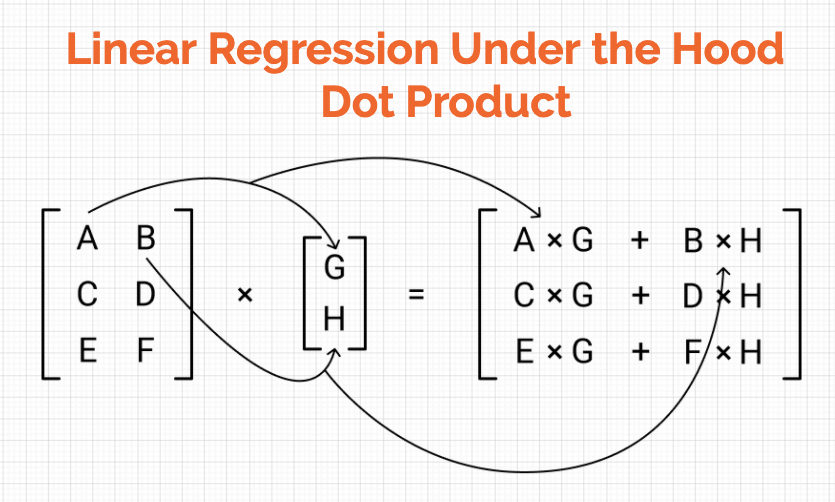

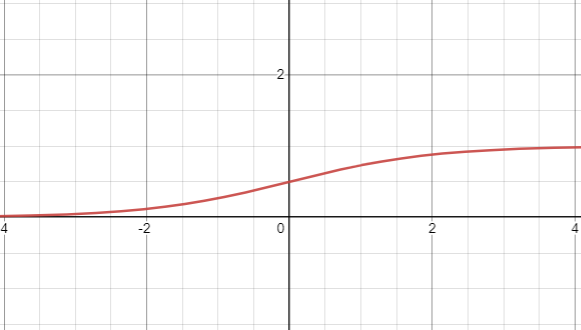

Reference: https://towardsdatascience.com/dot-product-in-linear-algebra-for-data-science-using-python-f113fb60c8f

In [64]:
model = LogisticRegression() # instantiating a model
model

LogisticRegression()

In [65]:
for i in model.parameters():
  print(i)

Parameter containing:
tensor([ 0.1653,  0.5335, -1.3609,  ...,  0.0638, -1.1626, -1.7514],
       dtype=torch.float64, requires_grad=True)
Parameter containing:
tensor([0.3000], dtype=torch.float64, requires_grad=True)


In [66]:
preds = model(x_train) # this is how you make a prediction
preds

tensor([[0.4521, 0.5479],
        [0.6670, 0.3330],
        [0.3769, 0.6231],
        ...,
        [0.5786, 0.4214],
        [0.6978, 0.3022],
        [0.5974, 0.4026]], dtype=torch.float64, grad_fn=<CatBackward0>)

In [67]:
epochs = 1000 # hyper-parameter
lr = 1e1 # hyper-parameter
optimizer = torch.optim.SGD(model.parameters(), lr = lr) # you will see many more! This is the way in which you want to update the model
loss_fn = torch.nn.functional.nll_loss # loss used for categorical variables

In [68]:
# the actual training process

# computing the forward() function using model() and finding its loss
loss = loss_fn(model(x_train),y_train)
print(loss)

# finding the gradients of the loss
loss.backward()

# updating the parameters
optimizer.step()
for i in model.parameters():
  print(i)

tensor(-0.5022, dtype=torch.float64, grad_fn=<NllLossBackward0>)
Parameter containing:
tensor([ 0.1936,  0.5749, -1.3333,  ...,  0.0657, -1.1426, -1.7356],
       dtype=torch.float64, requires_grad=True)
Parameter containing:
tensor([1.1691], dtype=torch.float64, requires_grad=True)


In [69]:
from tqdm import tqdm
from sklearn.metrics import accuracy_score, f1_score

model = LogisticRegression() # instantiating the model

epochs = 2000 # hyper-parameter
lr = 5e1 # hyper-parameter
optimizer = torch.optim.SGD(model.parameters(), lr = lr) # you will see many more! This is the way in which you want to update the model
loss_fn = torch.nn.functional.nll_loss # loss used for categorical variables

# logging all the metrics
train_losses = []
train_accs = []
train_f1 = []
test_losses = []
test_accs = []
test_f1 = []

# iterating multiple times to train the model
for epoch in tqdm(range(epochs+1)):

  preds = model(x_train) # generating predictions
  loss = loss_fn(preds, y_train) # finding the loss
  loss.backward() # finding the gradient

  optimizer.step() # updating the parameters
  optimizer.zero_grad() # resetting gradients to repeat

  # logging all training metrics
  train_losses.append(loss.detach().cpu().item())
  preds = preds.detach().cpu().numpy().T[1]
  preds[preds>=0.5] = 1
  preds[preds!=1] = 0
  train_accs.append(accuracy_score(y_train.detach().cpu().numpy(), preds))
  train_f1.append(f1_score(y_train.detach().cpu().numpy(), preds))

  # logging simultaneous test metrics
  preds = model(x_test)
  loss = loss_fn(preds, y_test)
  test_losses.append(loss.detach().cpu().item())
  preds = preds.detach().cpu().numpy().T[1]
  preds[preds>=0.5] = 1
  preds[preds!=1] = 0
  test_accs.append(accuracy_score(y_test.detach().cpu().numpy(), preds))
  test_f1.append(f1_score(y_test.detach().cpu().numpy(), preds))

100%|██████████| 2001/2001 [00:48<00:00, 41.61it/s]


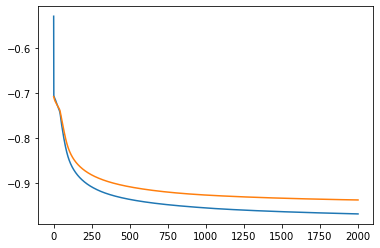

In [70]:
plt.plot(train_losses)
plt.plot(test_losses)

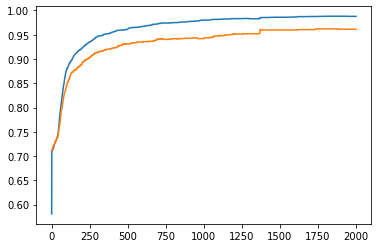

In [71]:
plt.plot(train_accs)
plt.plot(test_accs)

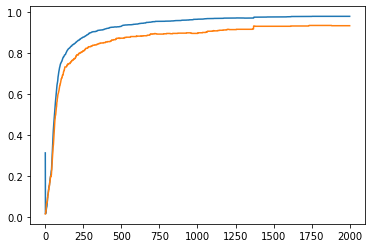

In [72]:
plt.plot(train_f1)
plt.plot(test_f1)

In [73]:
model.weight, model.bias

(Parameter containing:
 tensor([ 8.8832, 11.6065,  8.6098,  ...,  1.0500, -0.8859,  3.3571],
        dtype=torch.float64, requires_grad=True), Parameter containing:
 tensor([-0.1911], dtype=torch.float64, requires_grad=True))

In [51]:
data = pd.read_csv('/content/emails.csv')
print(data['enron'].sum(), data['yahoo'].sum())

6906 153
